In [2]:
#libraries used
import os
import ast
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interactive
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import networkx as nx

In [3]:
#check if running directly from main file or indirectly from a file outside this directory
# Get the current working directory
current_directory = os.getcwd()
if current_directory.endswith('601project'):
    data = pd.read_csv("Pokemon.csv")
else:
    data = pd.read_csv("../Pokemon.csv")

# Define custom colors for each type
type_colors = {
    'Bug': 'lightgreen',
    'Dark': 'black',
    'Dragon': 'darkblue',
    'Electric': 'yellow',
    'Fairy': 'lightpink',
    'Fighting': 'red',
    'Fire': 'orange',
    'Flying': 'lightblue',
    'Ghost': 'purple',
    'Grass': 'green',
    'Ground': '#E2BF65',
    'Ice': 'white',
    'Normal': 'grey',
    'Poison': 'mediumvioletred',
    'Psychic': 'lightcoral',
    'Rock': 'beige',
    'Steel': 'silver',
    'Water': 'blue',
    '1':'white'
}

In [4]:
#@Spandan you can remove this cell if you never use the mega or evolution
if current_directory.endswith('601project'):
    pokemon_data = pd.read_csv("pokemon-data-mega.csv")
else:
    pokemon_data = pd.read_csv("../pokemon-data-mega.csv")
#pokemon_data

# Select only the "Name" and "Next Evolution(s)" columns
pokemon_evolutions = pokemon_data[['Name', 'Next Evolution(s)']]

# Convert the string representation of the list to an actual list
pokemon_evolutions.loc[:, 'Next Evolution(s)'] = pokemon_evolutions['Next Evolution(s)'].apply(ast.literal_eval)

# Unstack the "Next Evolution(s)" column
unstacked_pokemon_evolutions = pokemon_evolutions.explode('Next Evolution(s)')

# Display the resulting DataFrame
#unstacked_pokemon_evolutions

# Adding a new column 'evolution' with values 1-4 repeating
data['Evolution'] = [1, 2, 3, 4] * (len(data) // 4)
#data.head()


In [5]:

# Define the effectiveness data
#Attacking Type is by columns, defending type by rows
type_effectiveness_data = {
    'Attacking_Type': ['Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice', 'Fighting', 'Poison', 'Ground',
                       'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy'],
    'Normal': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.0, 1.0, 1.0, 0.5, 1.0],
    'Fire': [1.0, 0.5, 0.5, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.5, 1.0, 1, 1.0, 2.0, 1.0],
    'Water': [1.0, 2.0, 0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1, 1.0, 1.0, 1.0],
    'Electric': [1.0, 1.0, 2.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1, 1.0, 1.0, 1.0],
    'Grass': [1.0, 0.5, 2.0, 0.5, 0.5, 1.0, 1.0, 0.5, 2.0, 0.5, 1.0, 0.5, 2.0, 1.0, 1, 1.0, 0.5, 1.0],
    'Ice': [1.0, 0.5, 0.5, 1.0, 2.0, 0.5, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.5, 1.0],
    'Fighting': [2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.5, 1.0, 0.5, 0.5, 0.5, 2.0, 0.0, 1.0, 2.0, 2.0, 0.5],
    'Poison': [1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 2.0, 1.0, 0.5, 0.5, 1.0, 1.0, 0.0, 2.0],
    'Ground': [1.0, 2.0, 1.0, 2.0, 0.5, 1.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0],
    'Flying': [1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0],
    'Psychic': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.0, 0.5, 1.0],
    'Bug': [1.0, 0.5, 1.0, 1.0, 2.0, 1.0, 0.5, 0.5, 1.0, 0.5, 2.0, 1.0, 1.0, 0.5, 1.0, 2.0, 0.5, 0.5],
    'Rock': [1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.5, 1.0, 0.5, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0],
    'Ghost': [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.5, 1.0, 1.0],
    'Dragon': [1.0, 0.5, 0.5, 0.5, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.5, 0.0],
    'Dark': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 0.5, 1.0, 0.5],
    'Steel': [1.0, 0.5, 0.5, 0.5, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.5, 1.0, 0.5, 2.0],
    'Fairy': [1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.0, 2.0, 0.5, 1.0]
}
#lengths = [len(normal), len(fire), len(water), len(elec), len(grass), len(ice), len(fighting), len(poison), len(ground), len(flying), len(psychic), len(bug), len(rock), len(ghost), len(dragon), len(dark), len(steel), len(fairy)]

# Create the DataFrame
pokemon_effectiveness_df = pd.DataFrame(type_effectiveness_data).set_index('Attacking_Type').transpose()

# Display the DataFrame
#print(pokemon_effectiveness_df)
#preview dataset for type effectiveness
pokemon_effectiveness_df

Attacking_Type  Normal  Fire  Water  Electric  Grass  Ice  Fighting  Poison  \
Normal             1.0   1.0    1.0       1.0    1.0  1.0       1.0     1.0   
Fire               1.0   0.5    0.5       1.0    2.0  2.0       1.0     1.0   
Water              1.0   2.0    0.5       1.0    0.5  1.0       1.0     1.0   
Electric           1.0   1.0    2.0       0.5    0.5  1.0       1.0     1.0   
Grass              1.0   0.5    2.0       0.5    0.5  1.0       1.0     0.5   
Ice                1.0   0.5    0.5       1.0    2.0  0.5       1.0     1.0   
Fighting           2.0   1.0    1.0       1.0    1.0  2.0       1.0     0.5   
Poison             1.0   1.0    1.0       1.0    0.5  1.0       1.0     0.5   
Ground             1.0   2.0    1.0       2.0    0.5  1.0       1.0     2.0   
Flying             1.0   1.0    1.0       0.5    2.0  1.0       2.0     1.0   
Psychic            1.0   1.0    1.0       1.0    1.0  1.0       2.0     2.0   
Bug                1.0   0.5    1.0       1.0    2.0  1.0       0.5     0.5   
Rock               1.0   2.0    1.0       1.0    1.0  2.0       0.5     1.0   
Ghost              0.0   1.0    1.0       1.0    1.0  1.0       0.0     0.5   
Dragon             1.0   0.5    0.5       0.5    0.5  2.0       1.0     1.0   
Dark               1.0   1.0    1.0       1.0    1.0  1.0       0.5     1.0   
Steel              1.0   0.5    0.5       0.5    1.0  2.0       1.0     1.0   
Fairy              1.0   0.5    1.0       1.0    1.0  1.0       0.5     2.0   

Attacking_Type  Ground  Flying  Psychic  Bug  Rock  Ghost  Dragon  Dark  \
Normal             1.0     1.0      1.0  1.0   0.5    0.0     1.0   1.0   
Fire               1.0     1.0      1.0  2.0   0.5    1.0     1.0   1.0   
Water              2.0     1.0      1.0  1.0   2.0    1.0     1.0   1.0   
Electric           0.0     2.0      1.0  1.0   1.0    1.0     1.0   1.0   
Grass              2.0     0.5      1.0  0.5   2.0    1.0     1.0   1.0   
Ice                2.0     2.0      1.0  1.0   1.0    1.0     2.0   1.0   
Fighting           1.0     0.5      0.5  0.5   2.0    0.0     1.0   2.0   
Poison             0.5     1.0      2.0  1.0   0.5    0.5     1.0   1.0   
Ground             1.0     0.0      1.0  0.5   2.0    1.0     1.0   1.0   
Flying             1.0     1.0      1.0  2.0   0.5    1.0     1.0   1.0   
Psychic            1.0     1.0      0.5  1.0   1.0    1.0     1.0   0.0   
Bug                1.0     0.5      2.0  1.0   1.0    0.5     1.0   2.0   
Rock               0.5     2.0      1.0  2.0   1.0    1.0     1.0   1.0   
Ghost              1.0     1.0      1.0  1.0   1.0    2.0     1.0   0.5   
Dragon             1.0     1.0      1.0  1.0   1.0    1.0     2.0   1.0   
Dark               1.0     1.0      2.0  1.0   1.0    2.0     1.0   0.5   
Steel              1.0     1.0      1.0  1.0   2.0    1.0     0.5   1.0   
Fairy              1.0     1.0      1.0  0.5   1.0    1.0     0.0   2.0   

Attacking_Type  Steel  Fairy  
Normal            0.5    1.0  
Fire              2.0    1.0  
Water             1.0    1.0  
Electric          1.0    1.0  
Grass             0.5    1.0  
Ice               0.5    1.0  
Fighting          2.0    0.5  
Poison            0.0    2.0  
Ground            2.0    1.0  
Flying            0.5    1.0  
Psychic           0.5    1.0  
Bug               0.5    0.5  
Rock              0.5    1.0  
Ghost             1.0    1.0  
Dragon            0.5    0.0  
Dark              1.0    0.5  
Steel             0.5    2.0  
Fairy             0.5    1.0

In [6]:
def Combat_Power(attack,special_atk,defense,special_def,hp):
    total_a = attack + special_atk
    total_d = defense + special_def
    numerator = math.floor(total_a * (total_d**0.5)*(hp**0.5)*(0.667934**2)) # Taking the average level as 25 so used the cpm value for level 25
    return math.floor(max(10,numerator/10))

#https://pokemongohub.net/post/wiki/cp-mechanics/
#https://pokemongohub.net/post/article/pokemon-go-cpm-list/

In [7]:
#Add Combat Power (CP) to the data frame
data['CP'] = data.apply(lambda row: Combat_Power(row['Attack'], row['Sp. Atk'], row['Defense'], row['Sp. Def'], row['HP']), axis=1)
#Preview
data.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Evolution    CP  
0       65       65     45           1      False          1   364  
1       80       80     60           1      False          2   586  
2      100      100     80           1      False          3   982  
3      122      120     80           1      False          4  1380  
4       60       50     65           1      False          1   300

In [8]:
df = pd.DataFrame(data)

# Combine 'Type 1' and 'Type 2' into a single column
stacked_types = pd.concat([df['Type 1'], df['Type 2'].replace('None', '')]).dropna()

# Get the frequency of each combined type
type_frequencies = stacked_types.value_counts().reset_index(name='Frequency')
#type_frequencies.head()
#pokemon_effectiveness_df.stack()
df_type_effectiveness = pd.DataFrame(type_effectiveness_data)

# Set 'Attacking_Type' as the index
df_type_effectiveness.set_index('Attacking_Type', inplace=True)

#Transpose the dataframe because the data is structured from the perspective of the pokemon type receiving an attack,
#we want know where it has an advantage over the opposing type
df_atk_type_effectiveness = df_type_effectiveness.T


# Defense: Count the occurrences of 2 (Effective) and 0.5 (Non-Effective) for each attacking type vs. defending pokemon type by pokemon type
# Offense: add pokemon type advantage vs by same pokemon type
weakness_counts = (df_type_effectiveness.iloc[:, 1:] == 2).sum(1)
resistance_counts = (df_type_effectiveness.iloc[:, 1:] <= 0.5).sum(1)
atk_effective_counts = (df_atk_type_effectiveness == 2).sum(1)

# Combine the counts into a single DataFrame
counts_df = pd.DataFrame({
    '# of Weaknesses': weakness_counts,
    '# of Resistances': resistance_counts,
    '# of Advantages': atk_effective_counts
})

#df_type_effectiveness.loc['Fire']

# What is the distribution of Pokémon types?
In the realm of Pokémon battles, understanding the distribution of Pokémon types is paramount. Pokémon types encompass various elements or specializations that a Pokémon possesses, ranging from nature-based categories like fire, water, and ground to domain-based classifications such as fighting, ghost, and psychic. These typings play a crucial role, offering distinct advantages or disadvantages in battles against other Pokémon.

Considered the foundational principle of Pokémon battling, understanding Pokémon typings is indispensable. It provides a significant edge, transcending player skill and often becomes a decisive factor in determining victory. This understanding hinges on recognizing the dynamics of advantages and resistances in the interactions between attacking and defending Pokémon types.

"Advantages" are where the Attacking Pokémon Type delivers an effective attack, increased damage against the Defending Pokémon Type, "Resistances" are where the Defending Pokémon delivers an non-effective attack, reduced damage from the attacking Pokémon type.

For instance, 'Water' holds an advantage over 'Fire,' 'Fire' prevails against 'Grass,' and 'Grass' triumphs over 'Water.' Conversely, 'Water' resists 'Fire,' 'Fire' resists 'Grass,' and 'Grass' resists 'Water.' However, not all relationships between Pokémon types are symmetrical. Some interactions are unidirectional, like 'Ground' being effective against 'Fire' without resisting a 'Fire' attack.

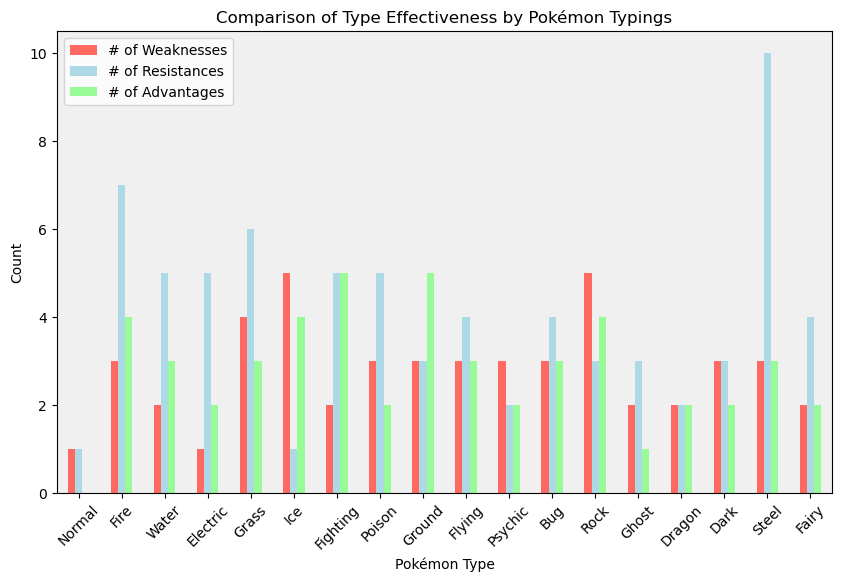

In [9]:


# Plot the bar graph
# Custom color palette with softer shades
soft_palette = sns.color_palette(['#FF6961', '#ADD8E6', '#98FB98'])
fig, ax = plt.subplots(figsize=(10, 6))
counts_df.plot(kind='bar', ax=ax, rot=45, color=soft_palette)
ax.set_facecolor('#F0F0F0')  # Set background color to a light gray

ax.set_title('Comparison of Type Effectiveness by Pokémon Typings')
ax.set_xlabel('Pokémon Type')
ax.set_ylabel('Count')
plt.show()

## Visualizing the Relationships between Pokémon Types with Network Graphs
Network Graphs below visualize the relationships between Pokémon Types, separated into two charts to better visualize and space the content by direction of the effectiveness. 
Additionally, there are instances where a Pokémon type resists or is effective against itself, forming self-referential arrows in the network graphs. An intriguing case is the 'Normal' type, impacting only defensive prowess with a vulnerability to 'Fighting' and resistance to 'Ghost.' This distinction is evident in the network graphs where 'Normal' appears in 'Resistances' but not in 'Advantages.'

The visual representation in the "Comparison of Type Effectiveness by Pokémon Typings" charts reveals strategic insights. Pokémon types such as Steel, Dragon, and Fire emerge as formidable contenders due to their numerous resistances, providing a competitive advantage in battles. Conversely, typings like Ice and Rock are deemed vulnerable, showcasing a plethora of weaknesses compared to other Pokémon types.


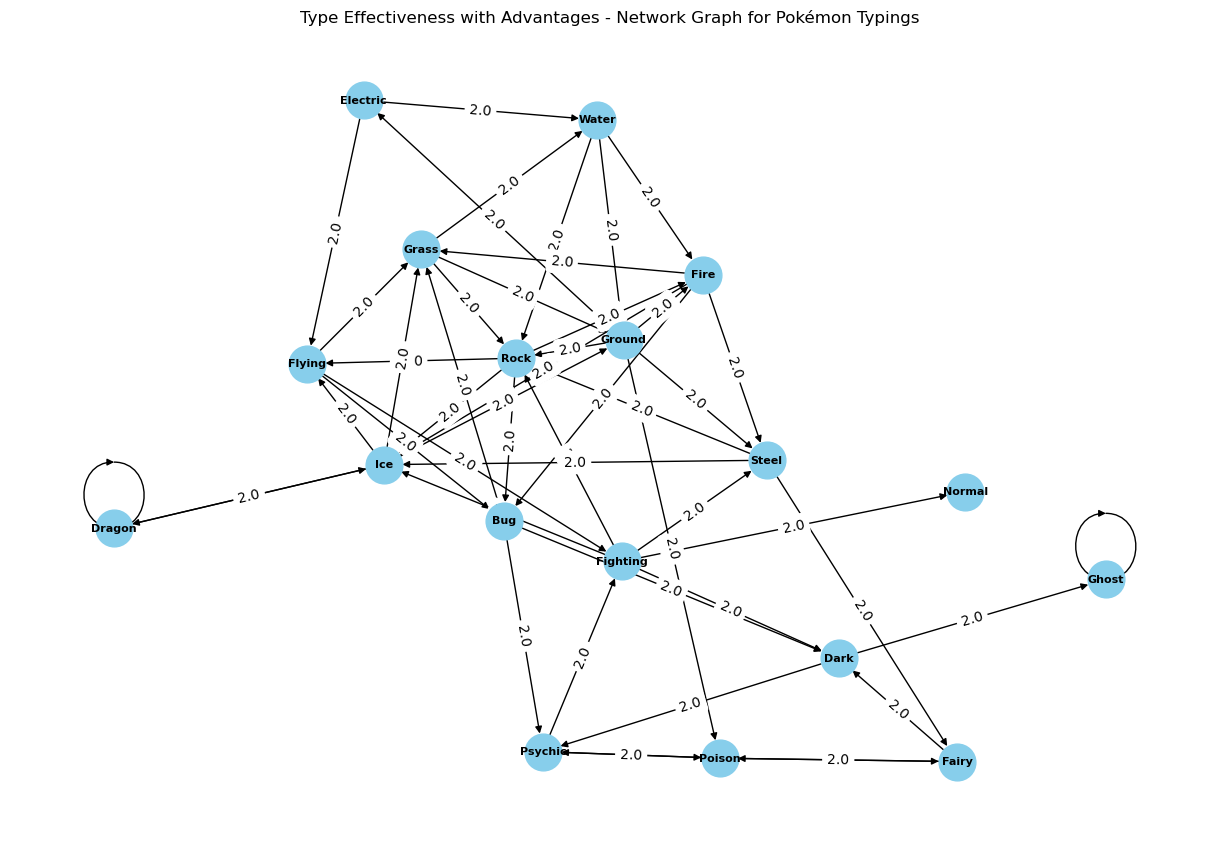

In [13]:

# Create a directed graph
G = nx.DiGraph()

# Add edges and nodes to the graph
for attacking_type in df_type_effectiveness.index:
    for defending_type, effectiveness in df_type_effectiveness.loc[attacking_type].items():
        if effectiveness == 2.0:  # Only add edges for non-neutral effectiveness
            G.add_edge(defending_type, attacking_type, weight=effectiveness)

# Use kamada_kawai_layout for better graph layout
pos = nx.kamada_kawai_layout(G)

# Plot the network graph with adjusted figure size
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.title('Type Effectiveness with Advantages - Network Graph for Pokémon Typings')
plt.show()

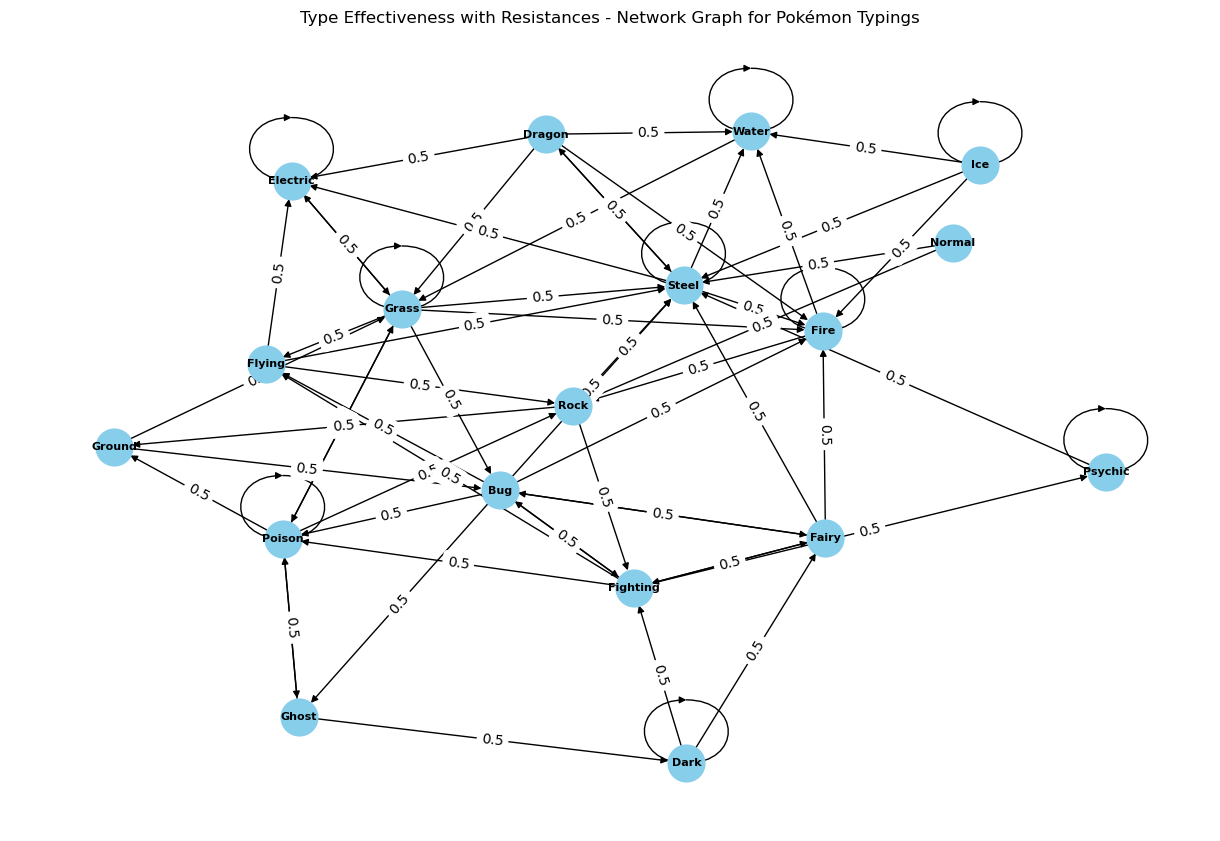

In [11]:
# Create a directed graph
G = nx.DiGraph()

# Add edges and nodes to the graph
for attacking_type in df_type_effectiveness.index:
    for defending_type, effectiveness in df_type_effectiveness.loc[attacking_type].items():
        if effectiveness == 0.5:  # Only add edges for non-neutral effectiveness
            G.add_edge(defending_type, attacking_type, weight=effectiveness)

# Use kamada_kawai_layout for better graph layout
#tried another graph and it was very condense and harder to see
pos = nx.kamada_kawai_layout(G)

# Plot the network graph with adjusted figure size
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.title('Type Effectiveness with Resistances - Network Graph for Pokémon Typings')
plt.show()

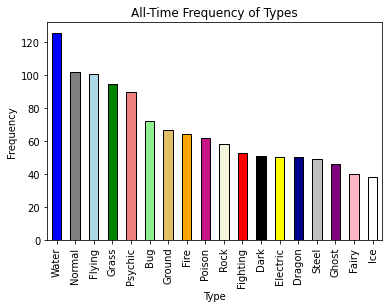

In [12]:
# Create a bar chart with custom colors and borders
type_frequencies.plot(kind='bar', x='index', y='Frequency', color=[type_colors.get(type, 'gray') for type in type_frequencies['index']], edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Type')
plt.title('All-Time Frequency of Types')
plt.legend().set_visible(False)  # This line hides the legend - we are using the colors associated to the type
plt.show()

## Analyzing the Distribution of Pokémon Types Across Generations 1-6 with Stacked Charts and Treemaps

In the expansive world of Pokémon spanning Generations 1 through 6, a trend emerges when it comes to the distribution of Pokémon types. Notably, the Water type stands out as the most prevalent among all Pokémon. This dominance underscores the strength of the Water typing, showcasing a versatile set of advantages and resistances while being relatively fortunate in weaknesses. In contrast, other formidable typings like Steel and Dragon, known for their superiority, exhibit a lesser presence across all generations.

A visual representation of this distribution is depicted through a bar graph, providing a comprehensive overview of the order and prevalence of each Pokémon type. The graph becomes a powerful tool for comparing the frequency of types and discerning patterns across the generations.

Furthermore, a treemap graph supplements the analysis, offering a tighter visualization that excels in comparing distributions without introducing any inherent bias based on order. Despite its condensed nature, the treemap graph remains effective in conveying the distribution dynamics, allowing for a nuanced examination of the prevalence of each Pokémon type.

The data underscores the strategic significance of Pokémon typings in the games. The prevalence of Water types suggests their adaptability and utility across different generations, making them a consistent presence in the Pokémon universe. Conversely, the lower occurrence of typings like Steel and Dragon hints at their exclusivity, potentially conveying a unique and sought-after status upon Pokémon possessing these attributes.

As we delve into the intricacies of Pokémon type distribution, the combination of a bar graph and a treemap graph provides a comprehensive and nuanced understanding, shedding light on the prevalence and rarity of different typings across the diverse generations of Pokémon..tes.

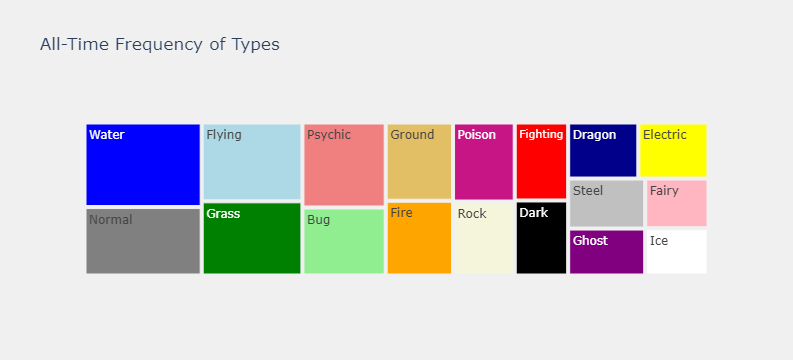

In [14]:
# Assuming type_frequencies is a DataFrame with columns 'index' and 'Frequency'
fig_treemap_types = px.treemap(type_frequencies, 
                 path=['index'],
                 values='Frequency',
                 color='index',
                 color_discrete_map=type_colors,
                 title='All-Time Frequency of Types')

# Hide the legend
fig_treemap_types.update_layout(legend=dict(title=dict(text='Type'), orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
# Set background color for the entire figure
fig_treemap_types.update_layout(
    plot_bgcolor='rgb(240,240,240)',  # Background color of the plot area
    paper_bgcolor='rgb(240,240,240)'  # Background color of the entire figure
)
# Show the treemap with border
fig_treemap_types.show()

In [15]:
# Combine 'Type 1' and 'Type 2' into a single column
stacked_types = pd.concat([df['Type 1'], df['Type 2'].replace('None', '')])

# Create a DataFrame with the stacked types and count frequencies
type_counts = stacked_types.value_counts()
    

In [16]:
# Give me a dataset of each Generation and Types introduced
# Create DataFrames for 'Type 1' and 'Type 2' with 'Generation' column
df_type1 = df[['Type 1', 'Generation']].rename(columns={'Type 1': 'Type'})
df_type2 = df[['Type 2', 'Generation']].rename(columns={'Type 2': 'Type'})

# Concatenate the two DataFrames
stacked_types_generation = pd.concat([df_type1, df_type2.replace('None', '')])

# Calculate the frequency of each combination of 'Generation' and 'Type'
frequency_df = stacked_types_generation.groupby(['Generation', 'Type']).size().reset_index(name='Frequency')

# Pivot the DataFrame to have 'Type' as columns
pivot_df = frequency_df.pivot(index='Generation', columns='Type', values='Frequency').fillna(0)

# Display the result
#print(stacked_types_generation)

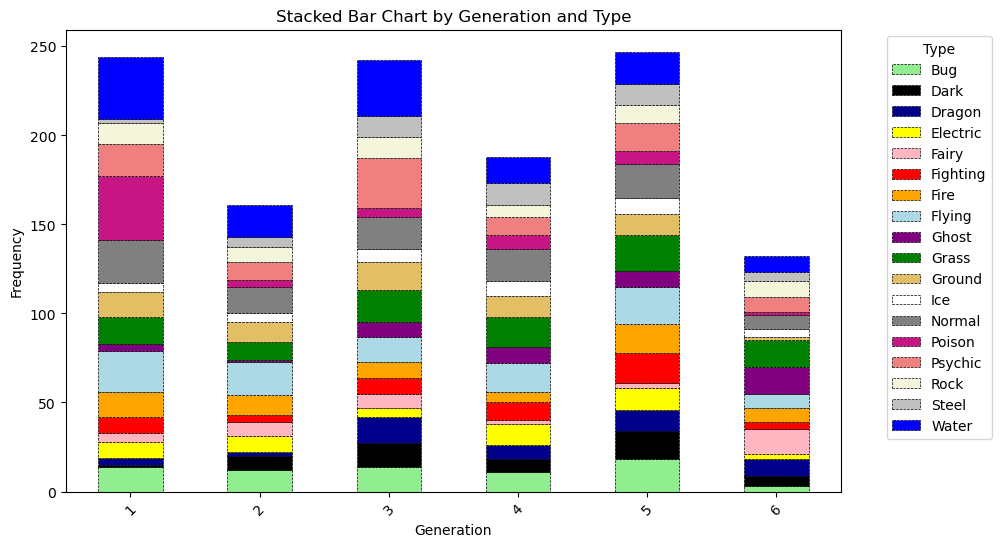

In [17]:
# Create a stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6),edgecolor="black", linestyle='dashed', linewidth=0.5, color=[type_colors.get(type, 'gray') for type in pivot_df.columns])

plt.title('Stacked Bar Chart by Generation and Type')
plt.xlabel('Generation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# Specify the legend outside the chart
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## In-Depth Pokémon Type Distribution Analysis with Bar Graphs and Treemaps
To understand the intricate distribution patterns of Pokémon types across generations, a dual approach was adopted, employing two stacked bar charts—one for actual values and another utilizing relative-fill. These charts collectively zeroed in on the nuanced aspects of distribution, offering insights into the variety and strategic possibilities in Pokémon battles.

In the Actual Values Stacked Bar chart, where the focus lies on Pokémon types rather than individual Pokémon, higher quantities signify a richer diversity and a broader spectrum of possibilities in battle scenarios. This aligns with the overarching trend observed in the All-Time distribution analysis, where the 'Water' typing consistently emerges as a prominent contributor, while other Pokémon types exhibit fluctuations in frequency over the generations.

Turning our attention to the Relative-Fill Stacked Bar chart, the contribution of 'Water' typing remains noticeable, yet a more distinct revelation unfolds— the 'Normal' typing emerges as a relative contributor in the distribution landscape. Notably, a discernible pattern surfaces, revealing that 'Dragon' and 'Steel' typings become more prevalent in later generations compared to their earlier counterparts.

To enhance the granularity of the distribution analysis, Treemaps were introduced, subplotted by generation. This strategic addition aids in dissecting the contributions of smaller subsets, providing a more comprehensive understanding of the distribution dynamics.

The comprehension of Pokémon type distribution across generations proves pivotal, particularly in the context of Pokémon tournaments with rules governing availability based on generation. This knowledge becomes a strategic asset, guiding trainers in selecting Pokémon types for their teams based on prevalence within a specific generation. In this way, understanding the distribution by generation becomes an invaluable tool for trainers seeking a competitive edge in the dynamic and ever-evolving world of Pokémon battles.




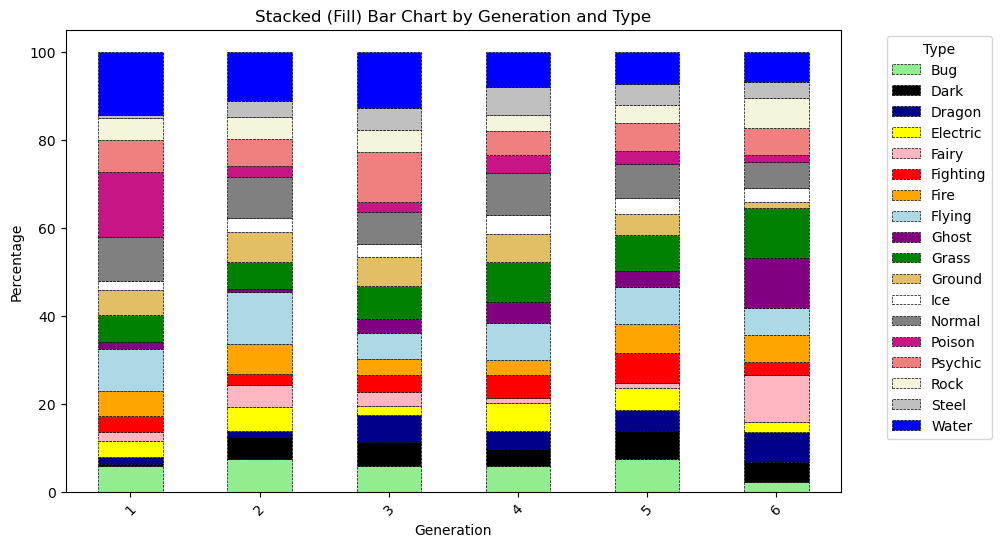

In [18]:

# Normalize the data to represent percentages
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Create a stacked bar chart with custom colors
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[type_colors.get(type, 'gray') for type in pivot_df_percentage.columns], linestyle='dashed', linewidth=0.5, edgecolor='black')

plt.title('Stacked (Fill) Bar Chart by Generation and Type')
plt.xlabel('Generation')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

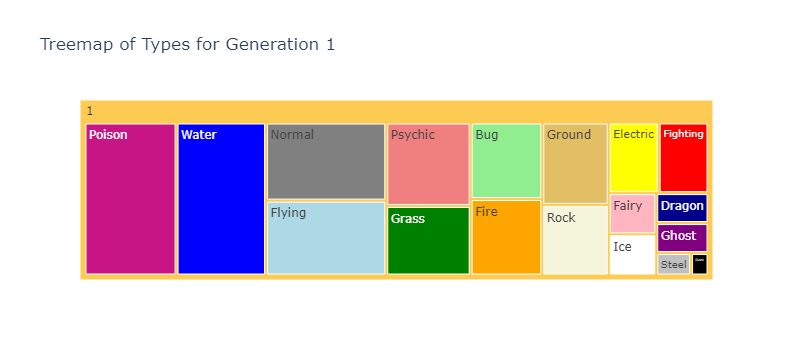

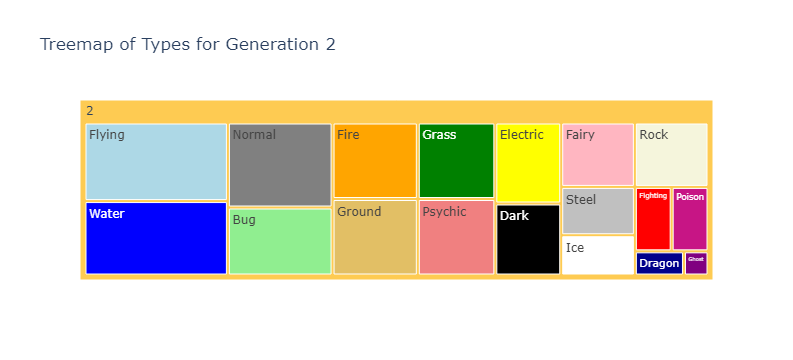

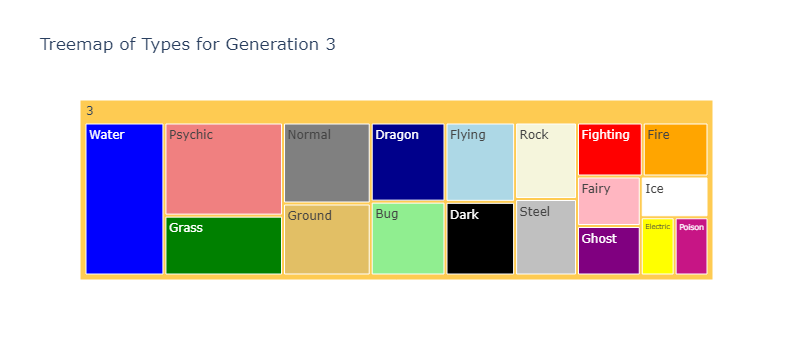

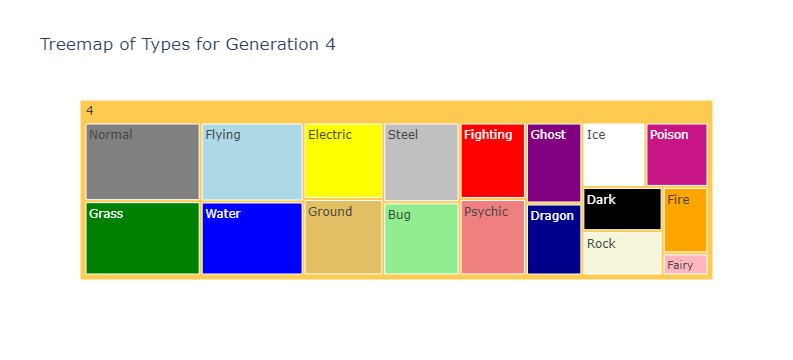

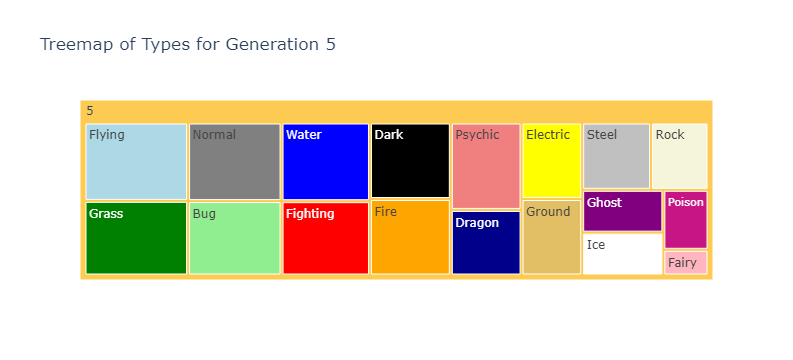

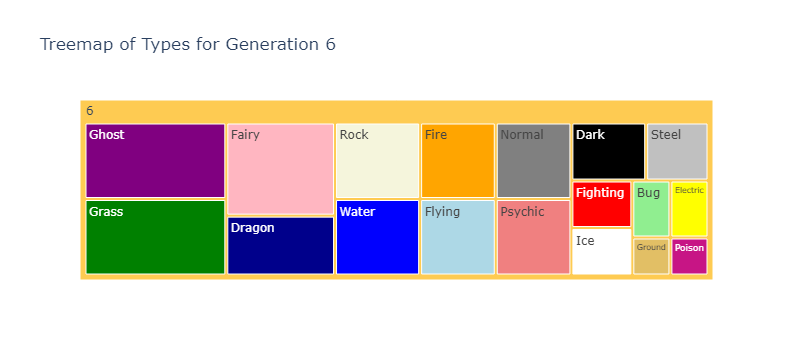

In [19]:
# Assuming stacked_types_generation is your DataFrame
df_count = stacked_types_generation.groupby(['Generation', 'Type']).size().reset_index(name='Count')

# Loop through each generation and create a treemap
for gen in df_count['Generation'].unique():
    # Filter the DataFrame for the current generation
    df_filtered = df_count[df_count['Generation'] == gen]

    # Create a treemap for the current generation
    fig = px.treemap(df_filtered,
                     path=['Generation', 'Type'],
                     values='Count',
                     title=f'Treemap of Types for Generation {gen}',
                     color='Type',
                     color_discrete_map=type_colors)

    # Show the figure
    fig.show()

In [20]:
# Group data by Generation and Type
df_count = stacked_types_generation.groupby(['Generation', 'Type']).size().reset_index(name='Count')

# Sort the DataFrame by Generation and Type
df_count = df_count.sort_values(['Generation', 'Type'])

# Create an initial row for Generation 1 with variance 0 for each Type
initial_row = pd.DataFrame({'Generation': [1] * len(df_count['Type'].unique()), 'Type': df_count['Type'].unique(), 'Count': 0, 'Variance': 0})

# Concatenate the initial row with the original DataFrame
df_count = pd.concat([initial_row, df_count])

# Calculate the variance between consecutive generations
df_count['Variance'] = df_count.groupby('Type')['Count'].diff()
# Drop rows with NaN values (resulting from the diff operation)
df_count = df_count.dropna()

# Update Variance to 0 for rows where Generation is '1'
#df_count.loc[df_count['Generation'] == 1, 'Variance'] = 0

# Debugging
#df_count[df_count['Type'] == 'Water']

In [21]:
# Debugging window
#selected_type = 'Water'

# Filter the data for the selected Type
#selected_type_data = df_count[df_count['Type'] == selected_type]


#df_waterfall =selected_type_data
#df_waterfall

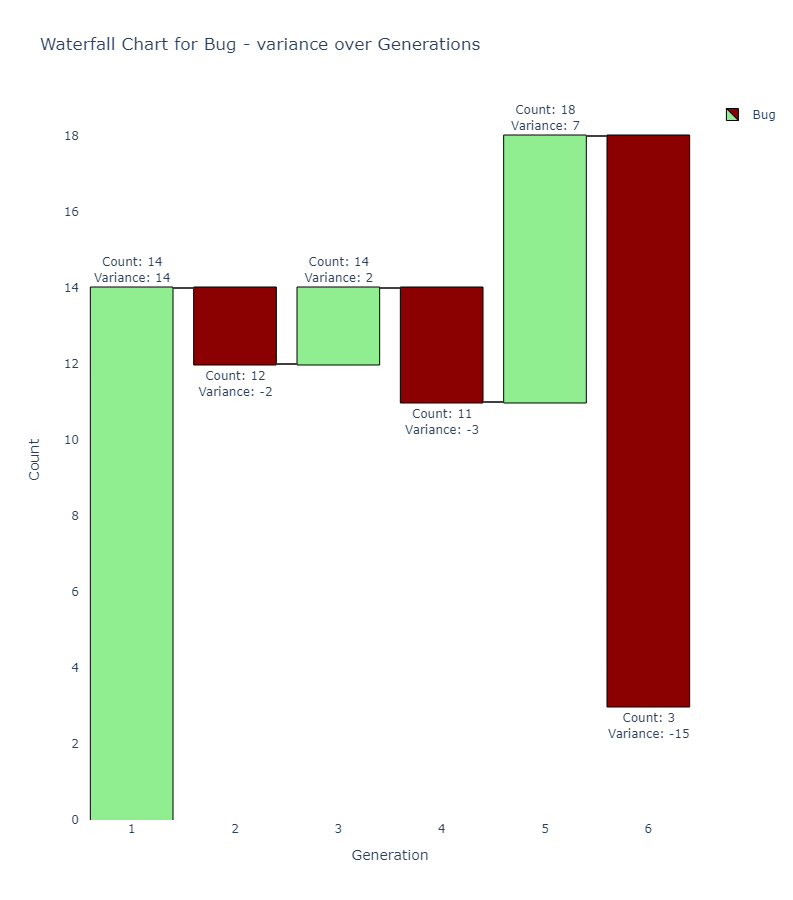

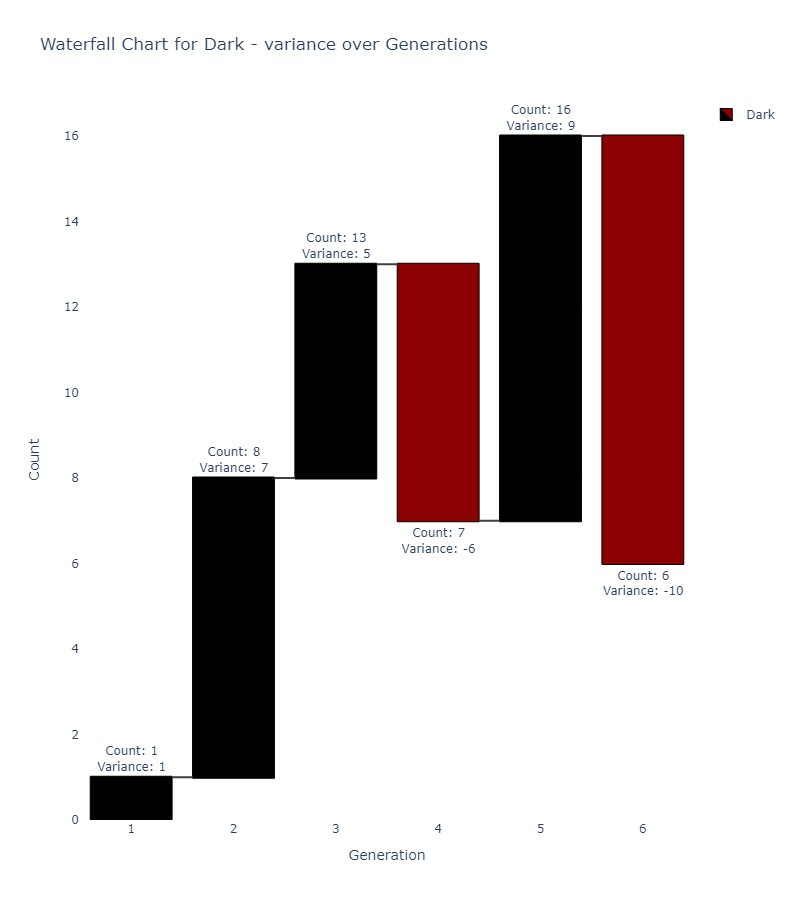

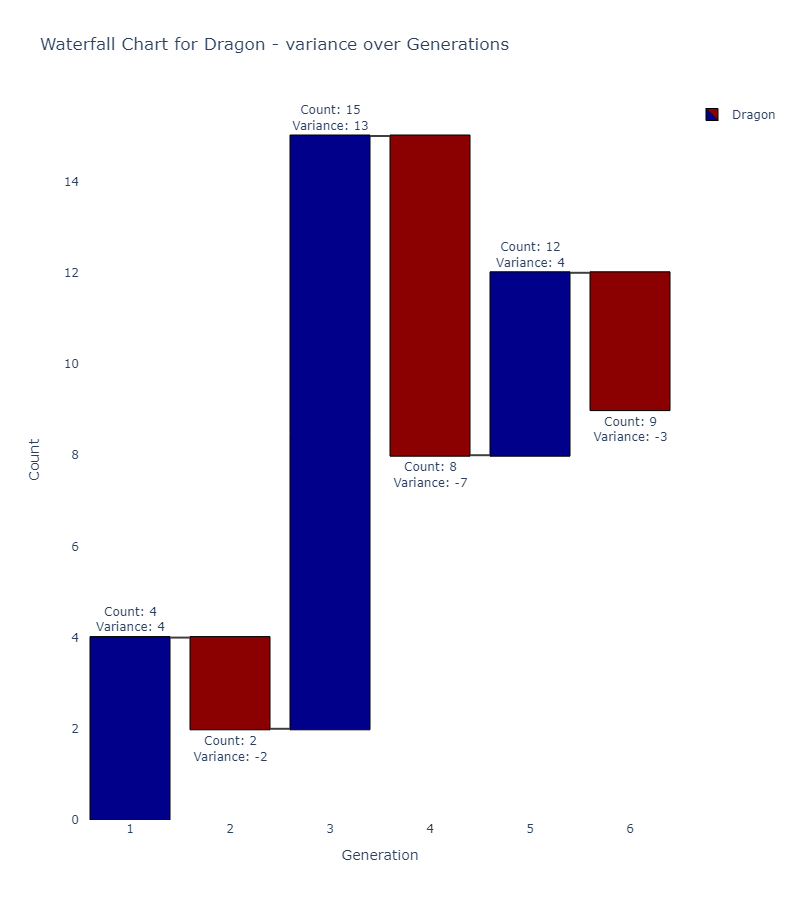

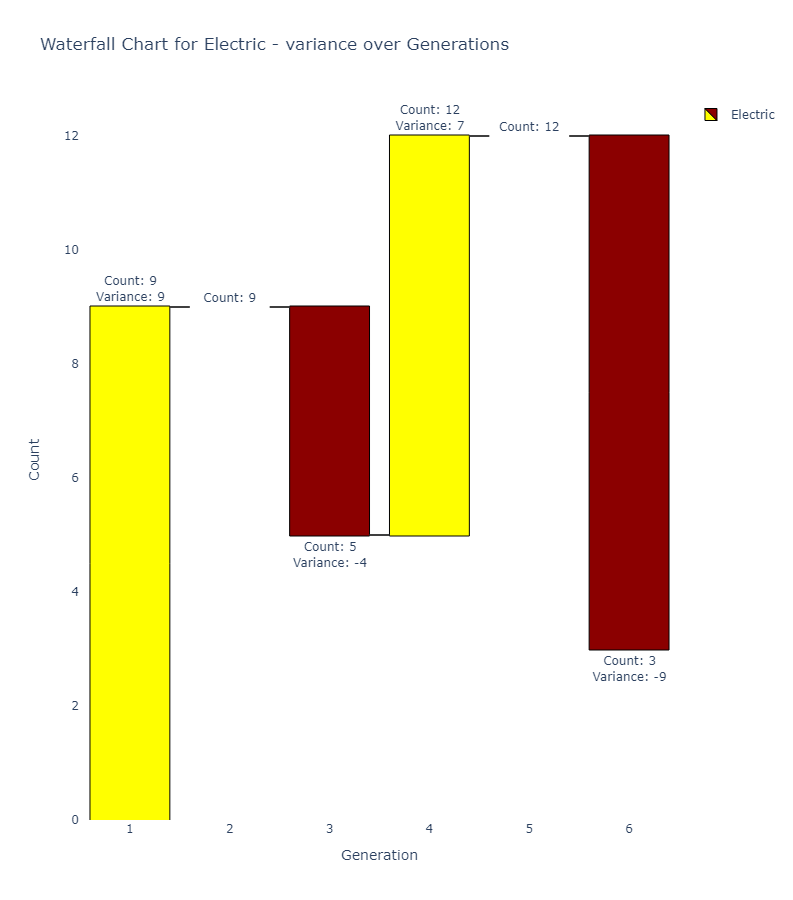

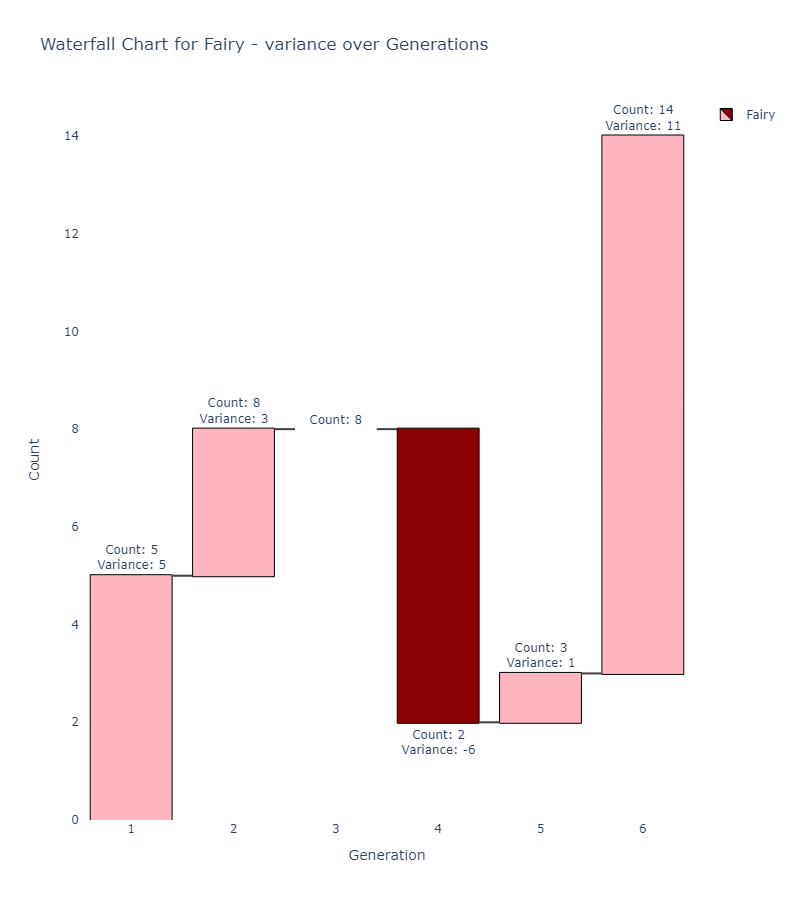

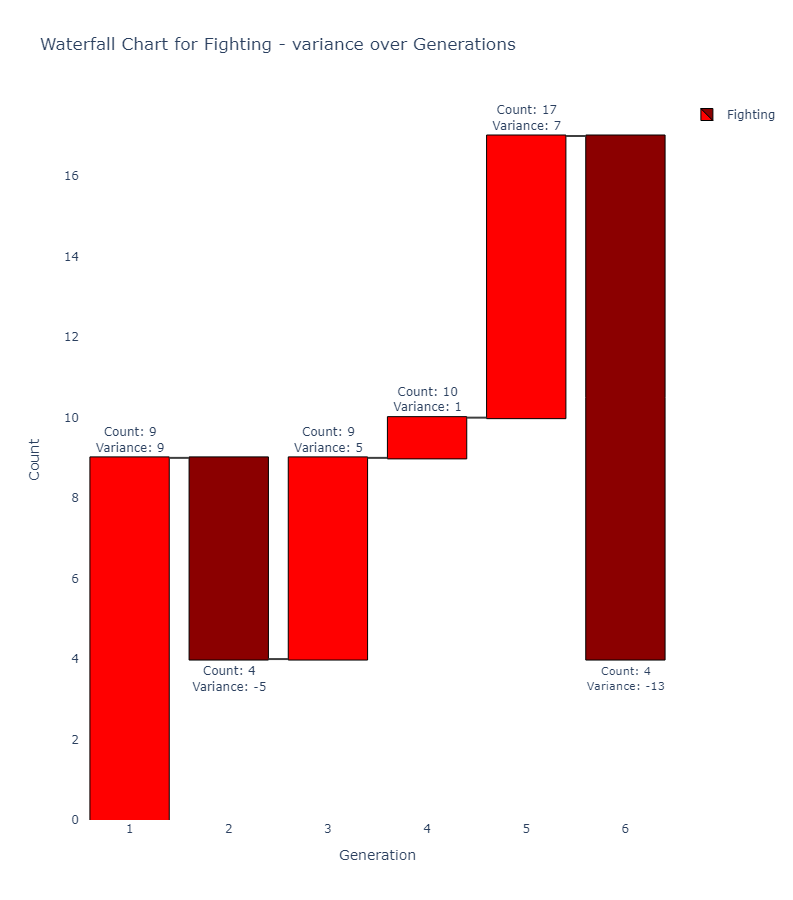

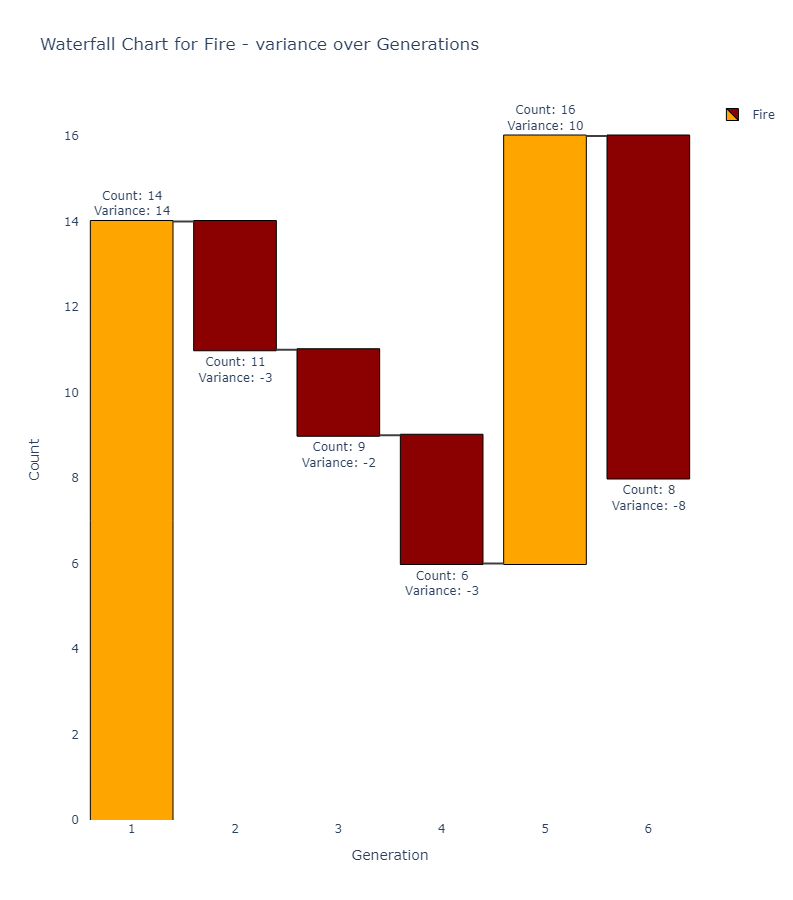

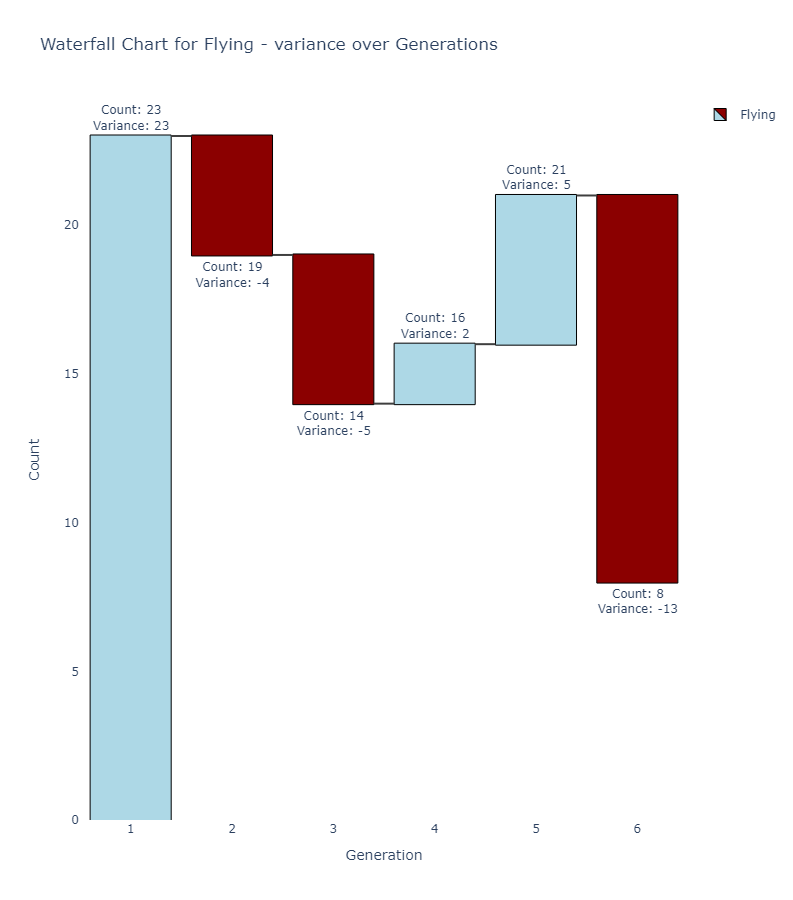

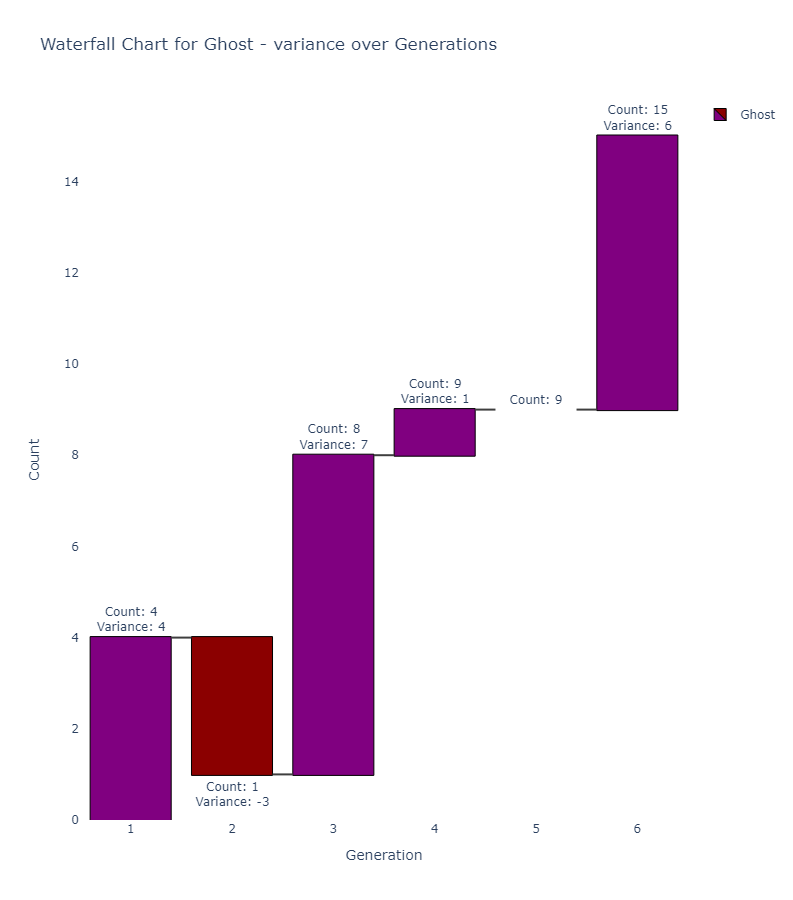

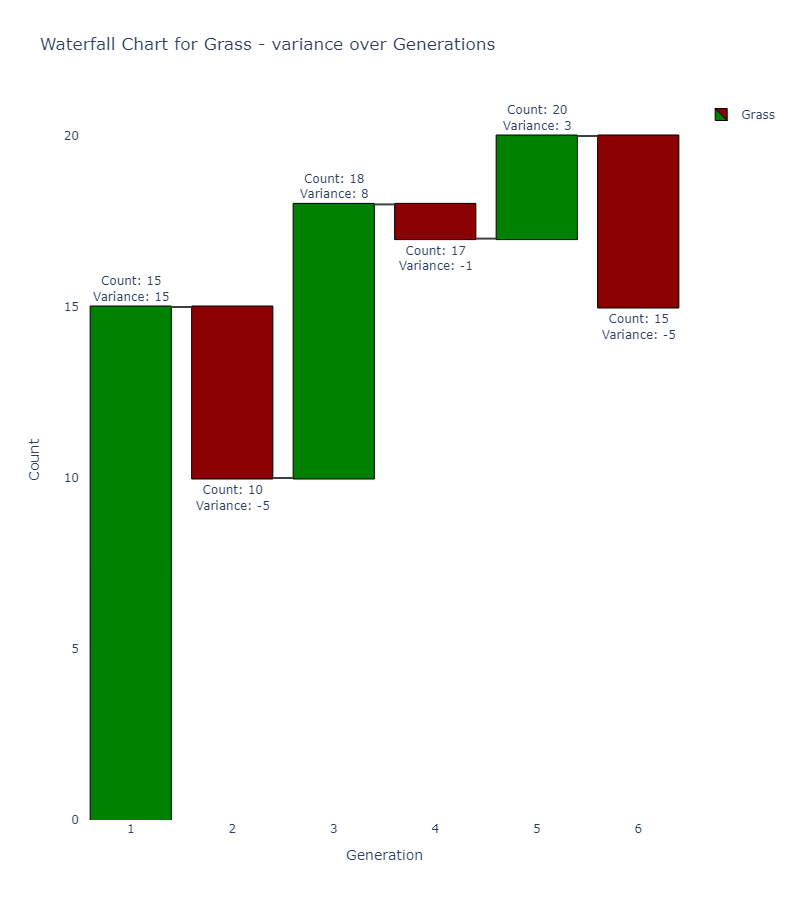

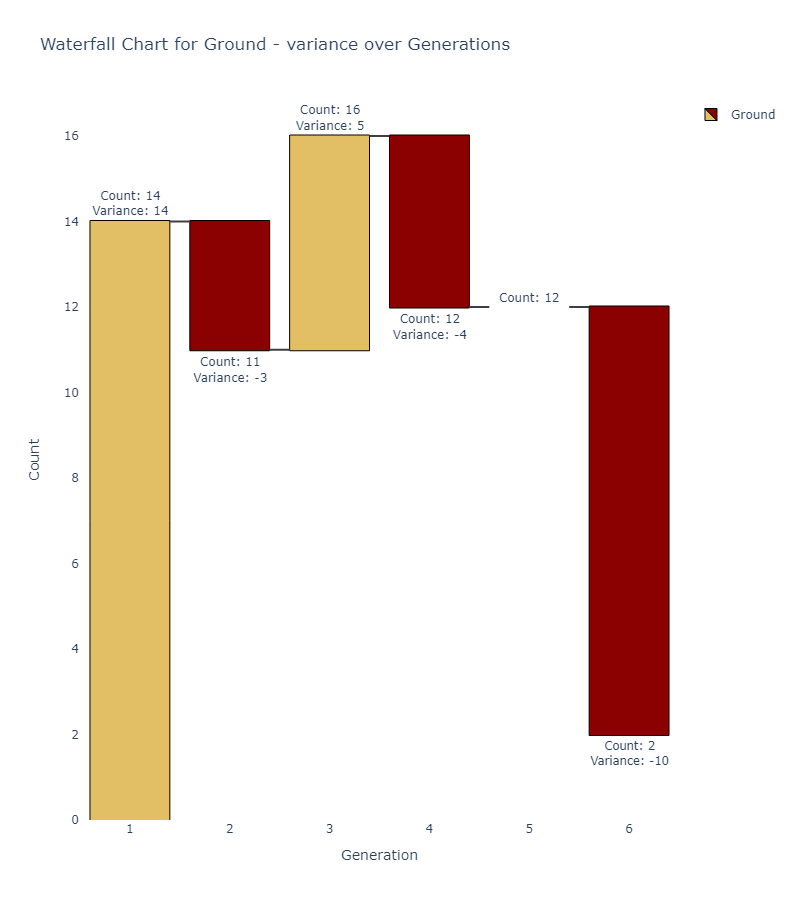

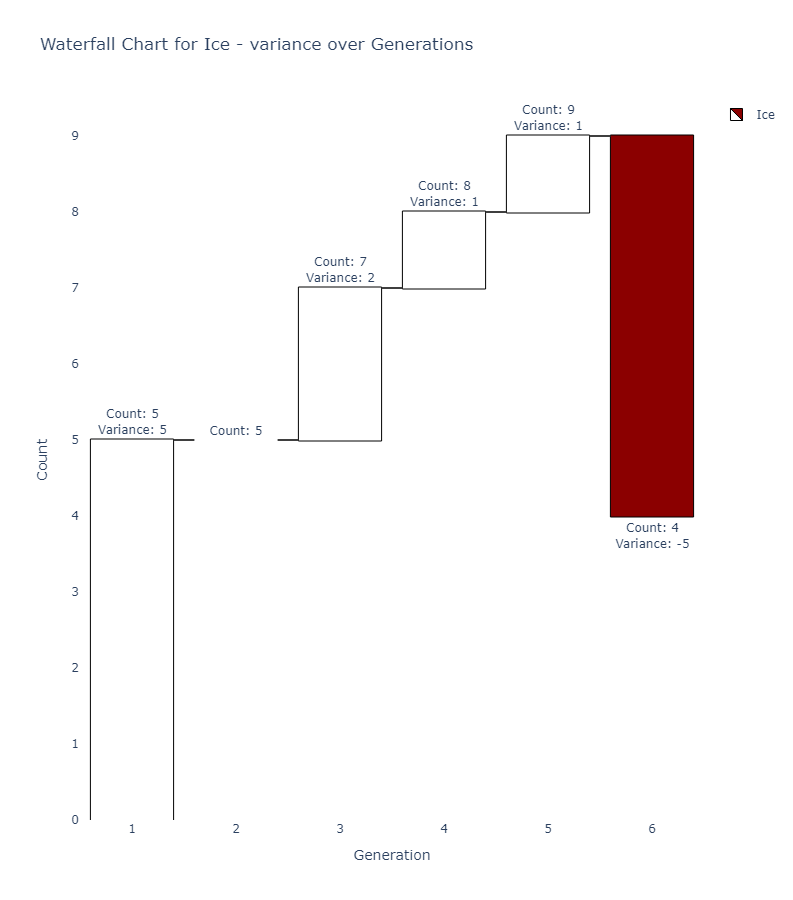

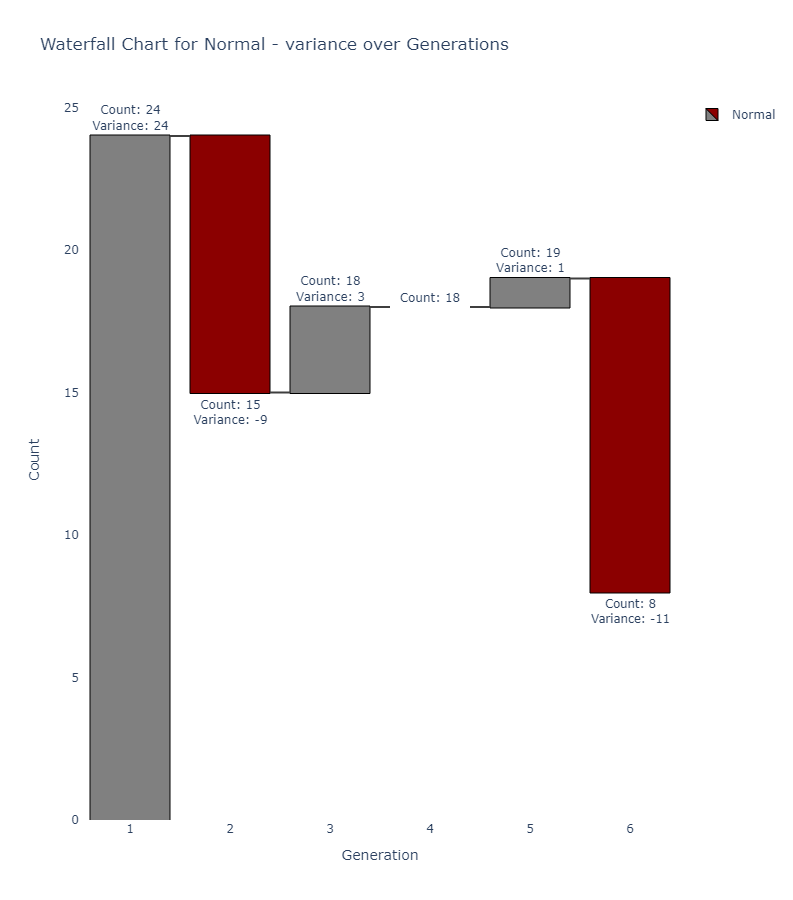

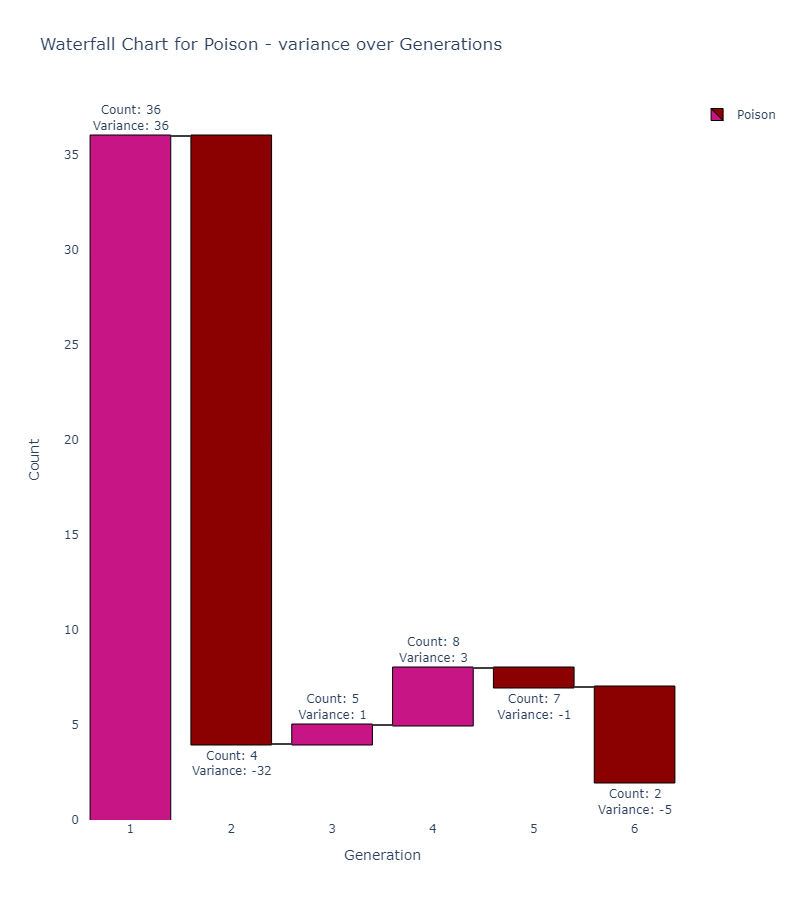

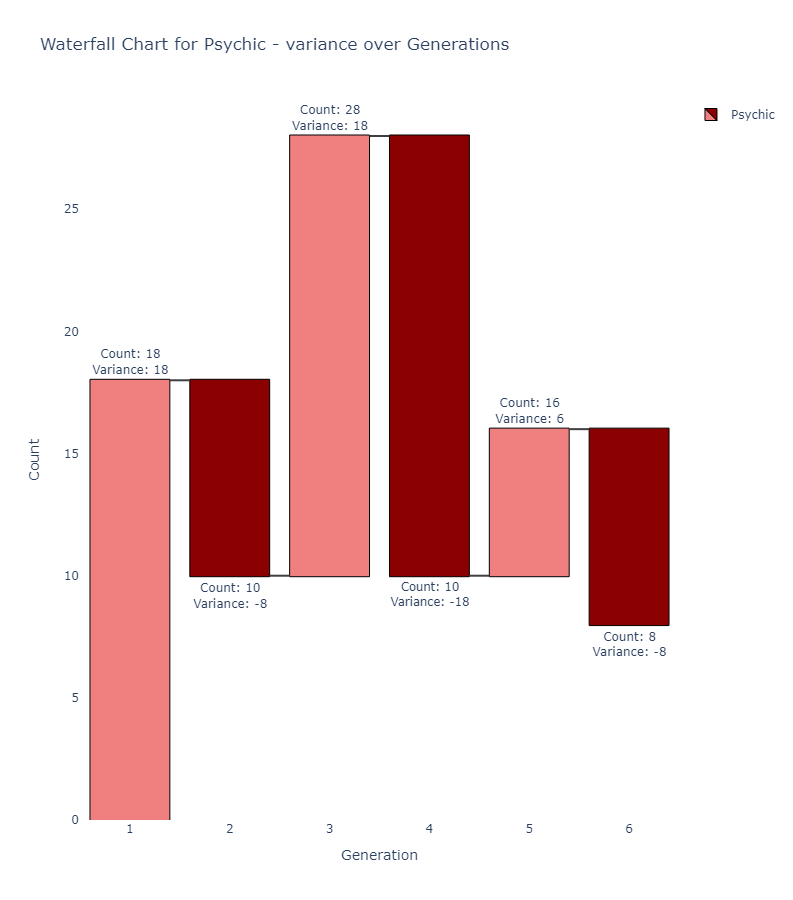

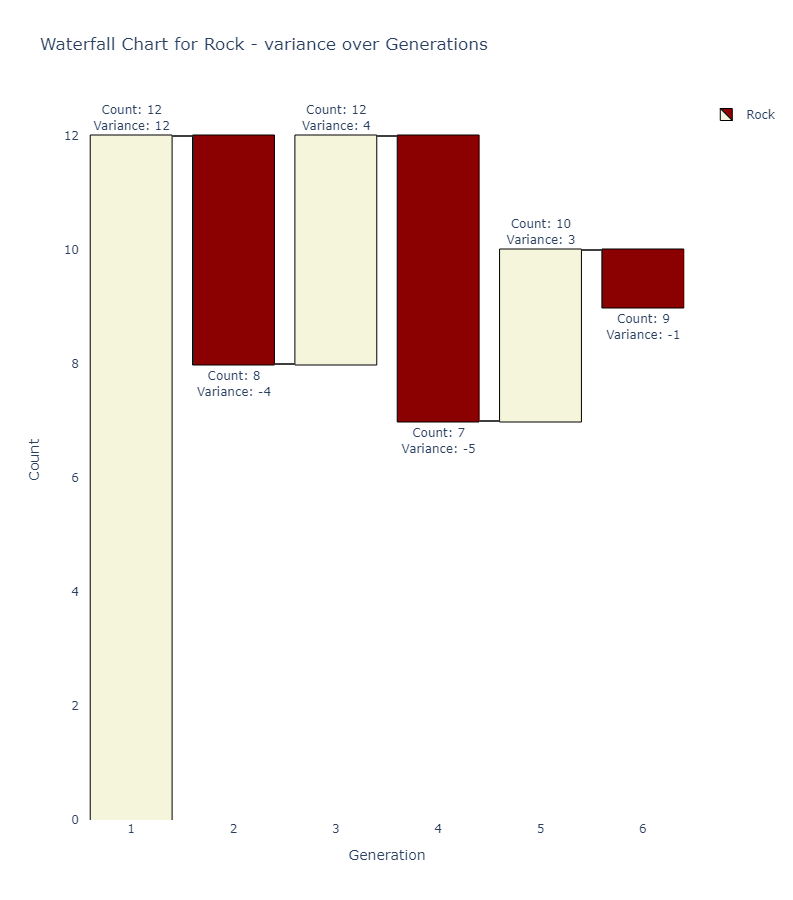

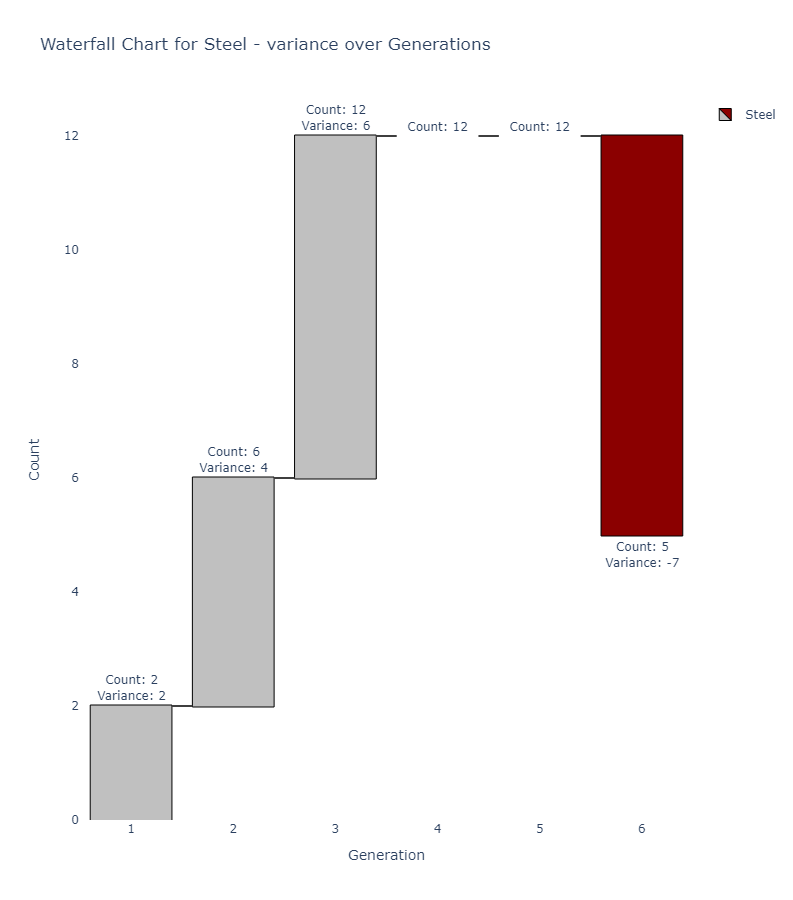

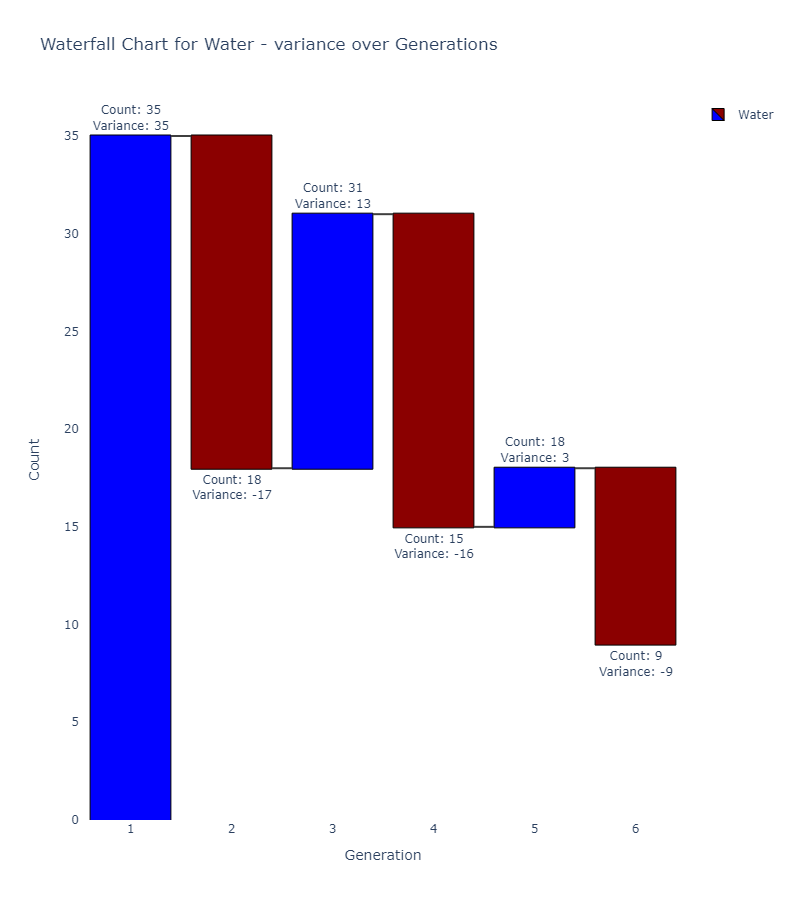

In [22]:
# Get unique types from df_count
unique_types = df_count['Type'].unique()

# Create a waterfall chart for each type
for selected_type in unique_types:
    # Filter the data for the selected Type
    selected_type_data = df_count[df_count['Type'] == selected_type]
    
    # Get the color for the selected type from type_colors, default gray if not found (just in case)
    type_color = type_colors.get(selected_type, 'gray')
    
    # Create a waterfall chart
    fig = go.Figure(go.Waterfall(
        name=selected_type,
        orientation="v",
        measure=selected_type_data['Variance'],
        x=selected_type_data['Generation'],
        textposition="outside",
        text=selected_type_data.apply(lambda row: f"Count: {int(row['Count'])}<br>Variance: {int(row['Variance'])}" if row['Variance'] != 0 else f"Count: {int(row['Count'])}",
                                axis=1),
        y=selected_type_data['Variance'],
        connector={"line": {"color": "rgb(63, 63, 63)"}},
        increasing=dict(marker=dict(color=type_color, line=dict(color='black', width=1))),
        decreasing=dict(marker=dict(color='darkred', line=dict(color='black', width=1))),
    ))

    # Update layout
    fig.update_layout(
        title=f"Waterfall Chart for {selected_type} - variance over Generations",
        showlegend=True,
        xaxis_title="Generation",
        yaxis_title="Count",
        paper_bgcolor='rgba(0, 0, 0, 0)',  # Set background color
        plot_bgcolor='rgba(0, 0, 0, 0)',  # Set plot area color
        height=900  # Set the desired height in pixels
    )

    # Show the figure
    fig.show()

## Analyzing Distribution Variances Across Generations with Waterfall Charts
Waterfall charts are used to visualize variance in distribution across Generations.
There are subplots by Pokémon Type as it was too noisy to attempt in a single visualization.
The only discernible pattern would be that Pokémon Types that were frequent in early Generations have a downward such as 'Water' and 'Normal', while the competitive Pokémon Typings that were bare have an upward rise such as 'Dragon' and 'Steel'.

# Are there noticeable patterns or advantages in having dual types compared to single-types Pokémon?
This analysis aims to compare the attributes of dual-type Pokémon against single-type Pokémon. The code classifies Pokémon into 'Single-Type' or 'Dual-Type' based on the presence or absence of a secondary type (Type 2). It then calculates average statistics (like HP, Attack, Defense, etc.) for each category and visualizes these averages using bar plots to directly compare single-type and dual-type Pokémon across various attributes.

In [23]:
#Create a new dataframe to begin next set of analyses so there is no conflict
pokemon_df = data.copy()
# Classify Pokémon as 'Single-Type' or 'Dual-Type'
pokemon_df['Type Count'] = pokemon_df['Type 2'].apply(lambda x: 'Dual-Type' if pd.notnull(x) else 'Single-Type')

# Classify Pokémon as 'Single-Type' or 'Dual-Type'
pokemon_df['Type Count'] = pokemon_df['Type 2'].apply(lambda x: 'Dual-Type' if pd.notnull(x) else 'Single-Type')

# Mean Calculation
numeric_cols = pokemon_df.select_dtypes(include=['float64', 'int64']).columns.drop('Generation')

# Calculate average stats for Single-Type and Dual-Type Pokémon
avg_stats_by_type = pokemon_df.groupby('Type Count')[numeric_cols].mean()
#debugging line
#avg_stats_by_type

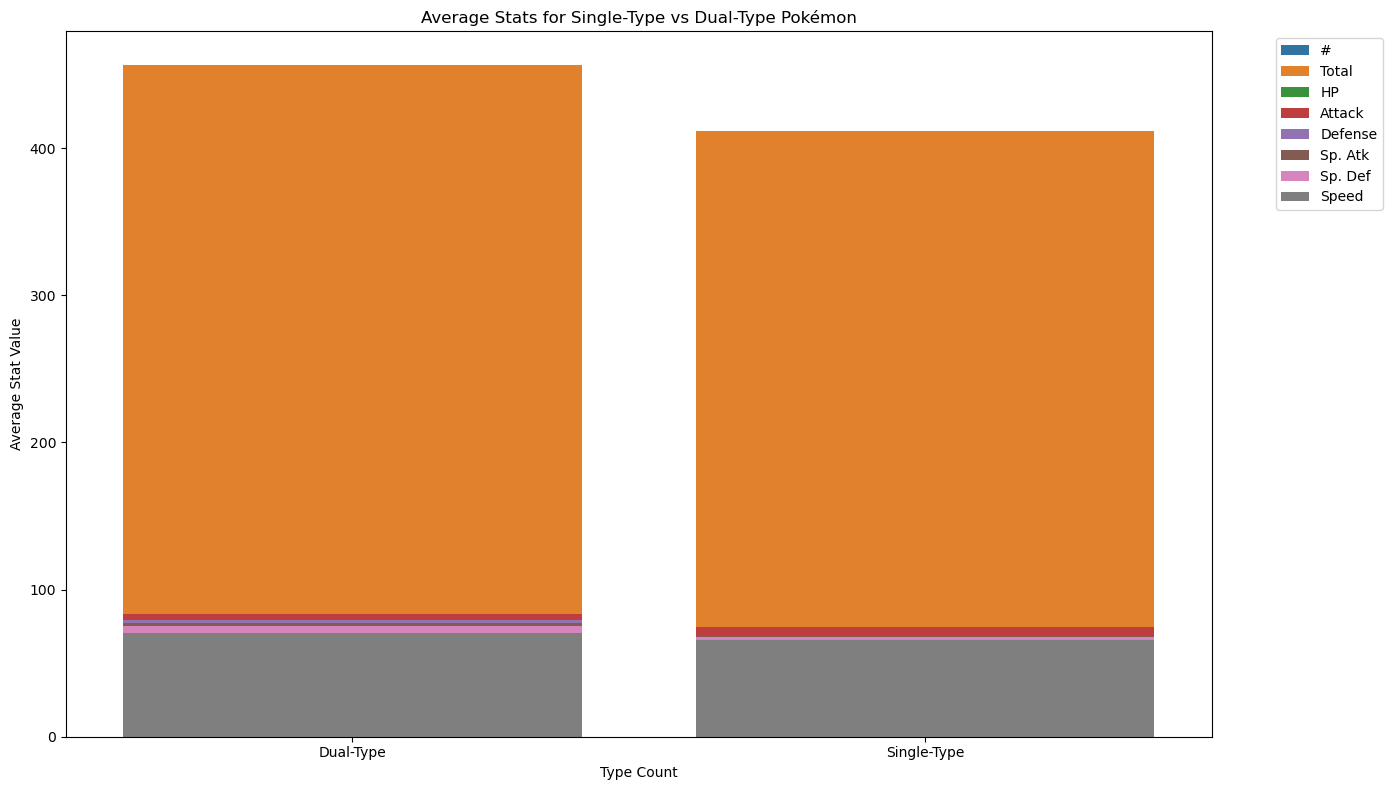

In [24]:
# Plot
# Define columns to exclude, only want the attributes
exclude_columns = ['CP', 'Evolution']
included_attribute_columns = [col for col in avg_stats_by_type.columns if col not in exclude_columns]
# Create a color palette
palette = sns.color_palette("tab10", n_colors=len(included_attribute_columns))

plt.figure(figsize=(14, 8))

for stat, color in zip(included_attribute_columns, palette):
    sns.barplot(x=avg_stats_by_type.index, y=avg_stats_by_type[stat], label=stat, color=color)

plt.title('Average Stats for Single-Type vs Dual-Type Pokémon')
plt.ylabel('Average Stat Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This analysis provides insights into whether having a dual type confers any statistical advantages or distinct patterns compared to being a single type, across common combat-related attributes. The visualization helps in understanding how dual typing might affect a Pokémon's overall capabilities, potentially influencing strategies in competitive play or team composition in the Pokémon games. Dual-type Pokémon, on average, may possess a statistical advantage over single-type Pokémon. The higher total stat value suggests that they are designed to be stronger or more versatile, potentially offering a broader range of abilities and combat strategies. This could be an intentional design choice to balance the additional vulnerabilities that come with having a second type, such as being susceptible to more types of super-effective attacks.
The trend might reflect the game developers' design philosophy over the course of the Pokémon series. Incorporating dual types with higher stats could be a way to introduce complexity and depth to the game, encouraging players to think strategically about type advantages, team composition, and the specific roles each Pokémon can play in battle.

# How have the attributes of Pokémon evolved acquired across different generations?
This analysis examines how Pokémon attributes have evolved across generations. The code calculates the average of key attributes (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) for Pokémon in each generation and applies a moving average to smooth out fluctuations. A single plot overlaying the moving averages for all attributes across generations was created to provide a comprehensive view of the trends. This analysis offered a historical perspective on how the design and balancing of Pokémon attributes have changed over time, reflecting the series' evolution and the shifting focus in game design. The use of moving averages highlighted long-term trends, making it easier to observe the gradual shifts in emphasis on different attributes, which could suggest changes in gameplay strategy and the meta-game over the years.



C:\Users\notso\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



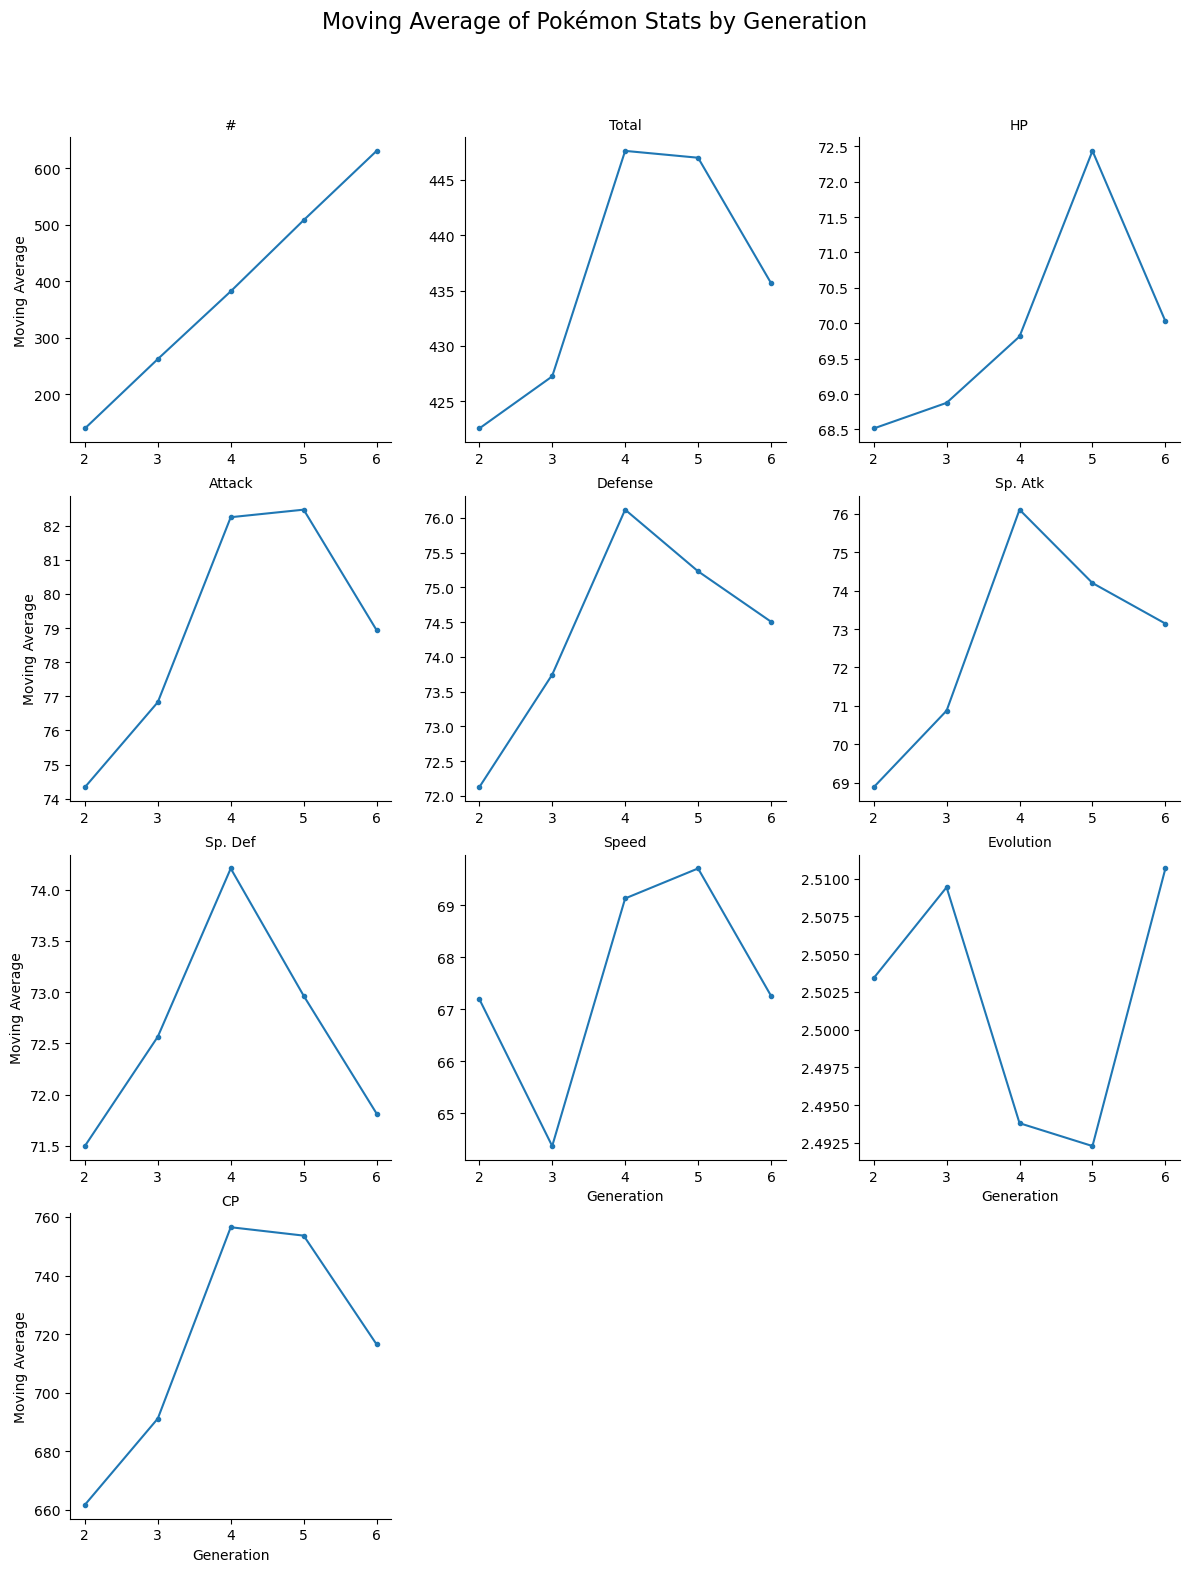

In [25]:
numeric_stats = pokemon_df.select_dtypes(include=[np.number]).drop(columns=['Generation'])

# Mean of numeric attributes for each generation
avg_stats_by_gen = pokemon_df.groupby('Generation')[numeric_stats.columns].mean().reset_index()

# Moving average with a window of 2 generations for smoothing
for stat in numeric_stats.columns:
    column_name = f'{stat}_MA'
    avg_stats_by_gen[column_name] = avg_stats_by_gen[stat].rolling(window=2).mean()

# Focusing on moving averages
melted_stats_ma = pd.melt(avg_stats_by_gen, id_vars=["Generation"], 
                          value_vars=[f'{stat}_MA' for stat in numeric_stats.columns], 
                          var_name='Stat', value_name='Moving Average')

melted_stats_ma['Stat'] = melted_stats_ma['Stat'].str.replace('_MA', '')

# Visualization
g = sns.FacetGrid(melted_stats_ma, col="Stat", col_wrap=3, height=4, sharex=False, sharey=False)
g = g.map(plt.plot, "Generation", "Moving Average", marker=".")
g.set_titles("{col_name}")
g.set_axis_labels("Generation", "Moving Average")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Moving Average of Pokémon Stats by Generation', fontsize=16)
plt.show()

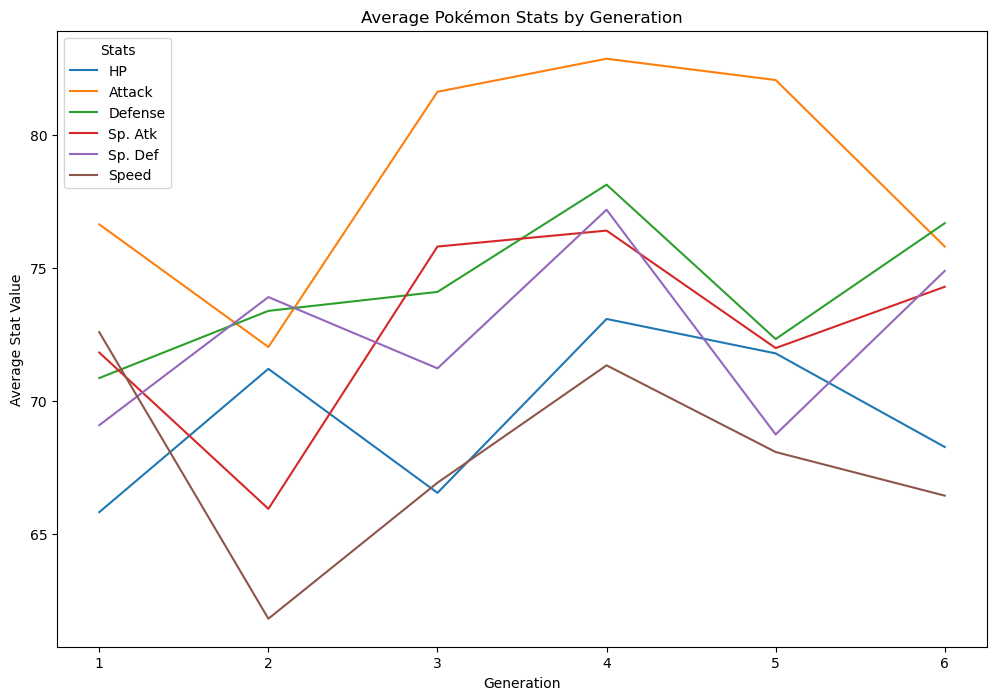

In [26]:
# Convert columns that should be numeric but are stored as objects
numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'] 

for col in numeric_cols:
    pokemon_df[col] = pd.to_numeric(pokemon_df[col], errors='coerce')  # 'coerce' will set invalid parsing as NaN

# Mean of each attribute for each generation
avg_stats_by_gen = pokemon_df.groupby('Generation')[numeric_cols].mean()

# Single plot for comparison
plt.figure(figsize=(12, 8))

for col in numeric_cols:
    sns.lineplot(data=avg_stats_by_gen, x=avg_stats_by_gen.index, y=col, label=col)

plt.title('Average Pokémon Stats by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Stat Value')
plt.legend(title='Stats')
plt.show()

Many fluctuations can be seen in the moving averages. This could indicate attempts by game developers to balance gameplay. A sudden rise or drop in the moving average of a particular stat reflects a response to perceived imbalances or player feedback from previous generations. However, attack seems to be the most prioritized stat across different generations while speed seems to be the least prioritized stat. The prominence of attack in the data indicates a consistent or growing emphasis on offensive capabilities over the generations. This could reflect the game developers' intention to make battles more dynamic and encourage strategies that revolve around offensive prowess. A possible reason for prioritizing Attack might be to facilitate a diverse range of battle strategies, making it advantageous for players to engage opponents aggressively.

# Are there specific types that are more likely to be associated with legendary Pokémon?
This analysis focuses on identifying if certain Pokémon types are more associated with Legendary status. The code calculates the proportion of Legendary Pokémon within each type, considering both primary (Type 1) and secondary (Type 2) types. These proportions were then visualized using a bar plot, ranking Pokémon types by the likelihood of being Legendary. This visualization sheds light on the distribution of Legendary Pokémon across different types, revealing which types are more commonly associated with Legendary status. The findings could influence players' perceptions of rarity and value for specific Pokémon types, highlighting the unique status of certain types in the context of Pokémon lore and gameplay mechanics.


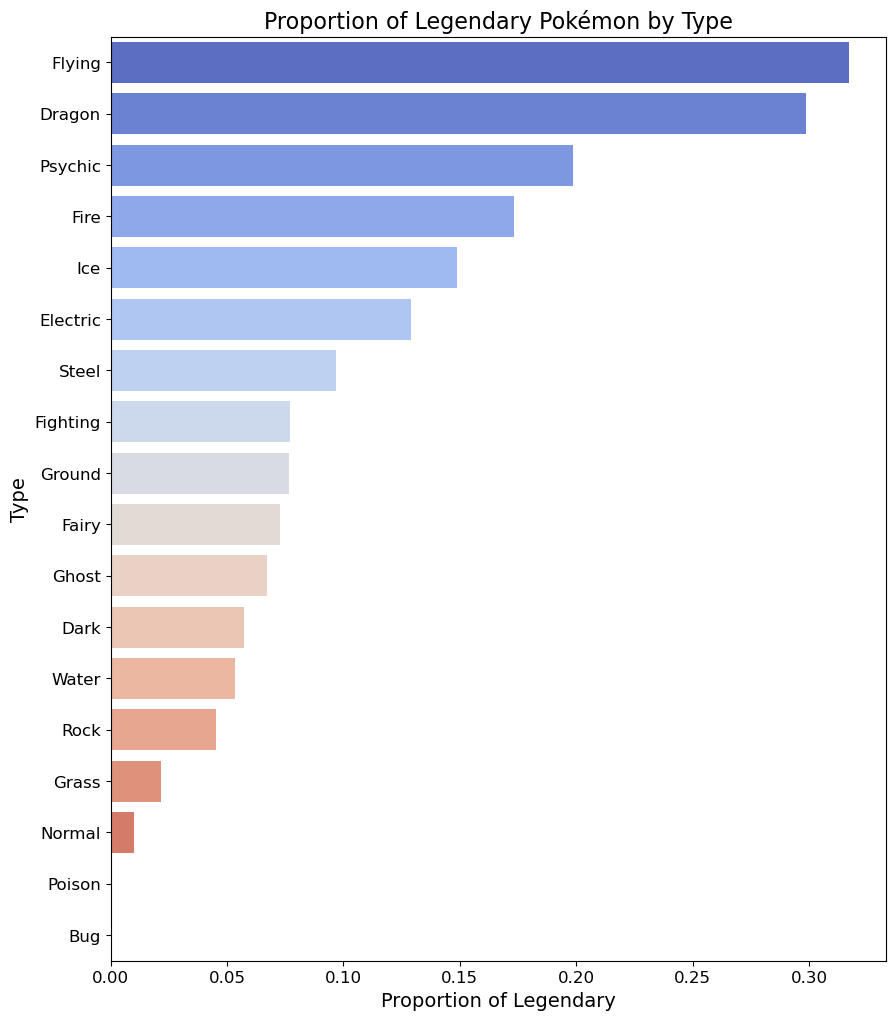

In [27]:
#Create a new dataframe to begin next set of analyses so there is no conflict
pokemon_df = data.copy()
# Identify Legendary Pokémon and calculate proportions per type
# Consider both Type 1 and Type 2
type_1_legendary = pokemon_df.groupby('Type 1')['Legendary'].value_counts(normalize=True).unstack().fillna(0)[True]
type_2_legendary = pokemon_df.groupby('Type 2')['Legendary'].value_counts(normalize=True).unstack().fillna(0)[True]
legendary_proportions = (type_1_legendary.add(type_2_legendary, fill_value=0) / 2).sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 12))  # Adjusted figure size for better readability
sns.barplot(x=legendary_proportions, y=legendary_proportions.index, palette="coolwarm")
plt.title('Proportion of Legendary Pokémon by Type', fontsize=16)
plt.xlabel('Proportion of Legendary', fontsize=14)
plt.ylabel('Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The observation that Flying, Dragon, Psychic, Fire, and Ice types are among the top types associated with Legendary Pokémon, based on their proportions, offers several insights into the design and thematic elements of the Pokémon series:

Game Balance and Rarity: Legendary Pokémon are designed to be rare and exceptionally powerful, and their type distribution reflects this. By assigning these types to Legendary Pokémon, game developers can emphasize their rarity and special status within the game world. These types often have unique abilities or powerful moves that set them apart from more common types, adding to the strategic depth and challenge of acquiring and mastering these Pokémon.

Strategic Diversity in Gameplay: The prevalence of these types among Legendary Pokémon introduces a strategic diversity to the gameplay. Players might seek out Legendary Pokémon of these types to overcome specific challenges or to bolster their team's capabilities in competitive battles. The distinct advantages and weaknesses of each type encourage players to think carefully about team composition and battle strategies.

Aesthetic and Narrative Significance: Beyond gameplay mechanics, the choice of types for Legendary Pokémon contributes to the narrative and aesthetic richness of the Pokémon universe. Fire, Ice, Dragon, Psychic, and Flying types allow for visually striking designs and compelling backstories that enhance the lore of the Pokémon world. These types facilitate storytelling, enabling developers to craft intricate histories and personalities for Legendary Pokémon that players can uncover and engage with throughout their adventures.

# How do legendary Pokémon compare to non-legendary Pokémon in terms of overall strength and individual attributes?
The expectation is that the visualizations will support the idea that these legendary Pokémon will be outliers or well above in overall strength compared to non-legendary Pokémon.

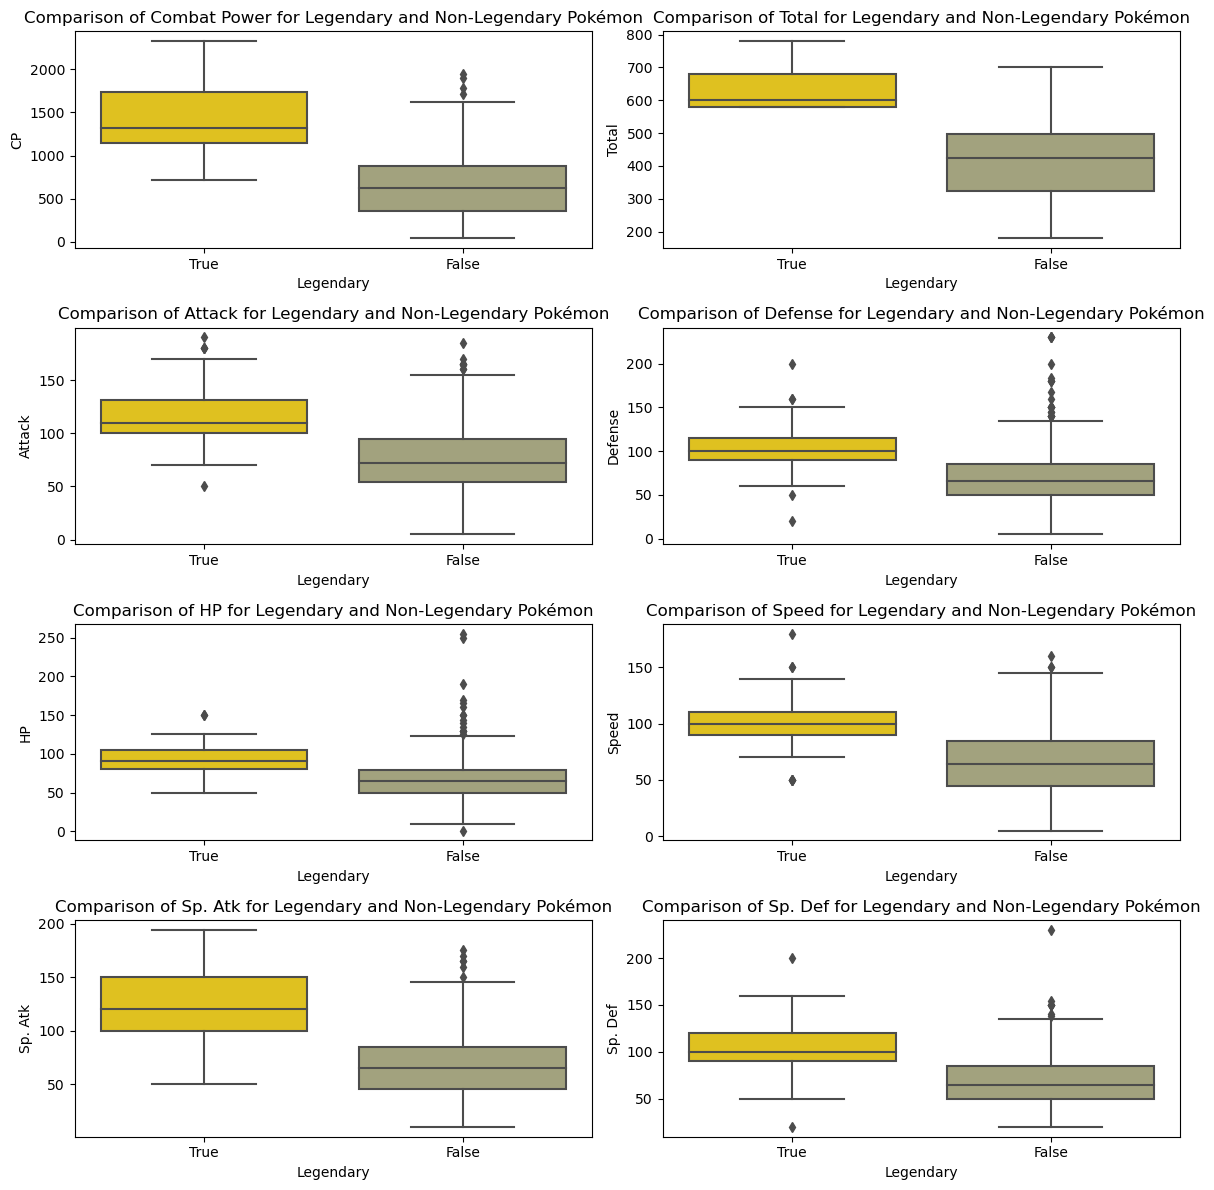

In [28]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
# Define the order for the 'Legendary' variable
legendary_order = [True, False]
# Define Pokemon-themed color palette
pokemon_palette = {
    True: '#FFD700',  # Gold for Legendary
    False: '#A8A878'  # Grayish color for Non-Legendary
}
# Boxplot for CP
sns.boxplot(x='Legendary', y='CP', data=data, ax=axes[0, 0], order=legendary_order, palette=pokemon_palette)
axes[0, 0].set_title('Comparison of Combat Power for Legendary and Non-Legendary Pokémon')

# Boxplot for Total
sns.boxplot(x='Legendary', y='Total', data=data, ax=axes[0, 1], order=legendary_order, palette=pokemon_palette)
axes[0, 1].set_title('Comparison of Total for Legendary and Non-Legendary Pokémon')

# Boxplot for Attack
sns.boxplot(x='Legendary', y='Attack', data=data, ax=axes[1, 0], order=legendary_order, palette=pokemon_palette)
axes[1, 0].set_title('Comparison of Attack for Legendary and Non-Legendary Pokémon')

# Boxplot for Defense
sns.boxplot(x='Legendary', y='Defense', data=data, ax=axes[1, 1], order=legendary_order, palette=pokemon_palette)
axes[1, 1].set_title('Comparison of Defense for Legendary and Non-Legendary Pokémon')

# Boxplot for HP
sns.boxplot(x='Legendary', y='HP', data=data, ax=axes[2, 0], order=legendary_order, palette=pokemon_palette)
axes[2, 0].set_title('Comparison of HP for Legendary and Non-Legendary Pokémon')

# Boxplot for Speed
sns.boxplot(x='Legendary', y='Speed', data=data, ax=axes[2, 1], order=legendary_order, palette=pokemon_palette)
axes[2, 1].set_title('Comparison of Speed for Legendary and Non-Legendary Pokémon')

# Boxplot for Sp. Atk
sns.boxplot(x='Legendary', y='Sp. Atk', data=data, ax=axes[3, 0], order=legendary_order, palette=pokemon_palette)
axes[3, 0].set_title('Comparison of Sp. Atk for Legendary and Non-Legendary Pokémon')

# Boxplot for Sp. Def
sns.boxplot(x='Legendary', y='Sp. Def', data=data, ax=axes[3, 1], order=legendary_order, palette=pokemon_palette)
axes[3, 1].set_title('Comparison of Sp. Def for Legendary and Non-Legendary Pokémon')

# Adjust layout
plt.tight_layout()
plt.show()

## Comparative Analysis: Legendary vs. Non-Legendary Pokémon Strength and Attributes with Boxplots
Exploring overall strength and individual attributes, a detailed comparison between legendary and non-legendary Pokémon unveils intriguing insights with the usage of Boxplots.

To gauge overall strength, Combat Power and Total become focal points of examination. The Interquartile Range (IQR) analysis reveals a compelling trend—the Combat Power and Total values of legendary Pokémon consistently surpass those of their non-legendary counterparts. With few exceptions as outliers, legendary Pokémon consistently dominate in these overarching strength metrics.

Delving into the specifics of individual attributes, the disparity between legendary and non-legendary Pokémon is pronounced. Once again, the IQR for legendary Pokémon significantly outperforms that of non-legendary Pokémon. This divergence is particularly notable in attributes like Attack and Special Attack, where the gaps between the two categories are accentuated.

In a comprehensive summary, it is apparent that the Interquartile Range (IQR) analysis consistently demonstrates the superiority of legendary Pokémon. This observation aligns with expectations and is substantiated by the compelling visualizations provided. Legendary Pokémon outperform non-legendary counterparts, both in overall strength and specific attributes, solidifying their distinct prowess in comparison.

## Combat Power, Total Attribute and Type for Battle Effectiveness

### How do different types of Pokémon correlate with their overall strength, as indicated by the 'Total' attribute?

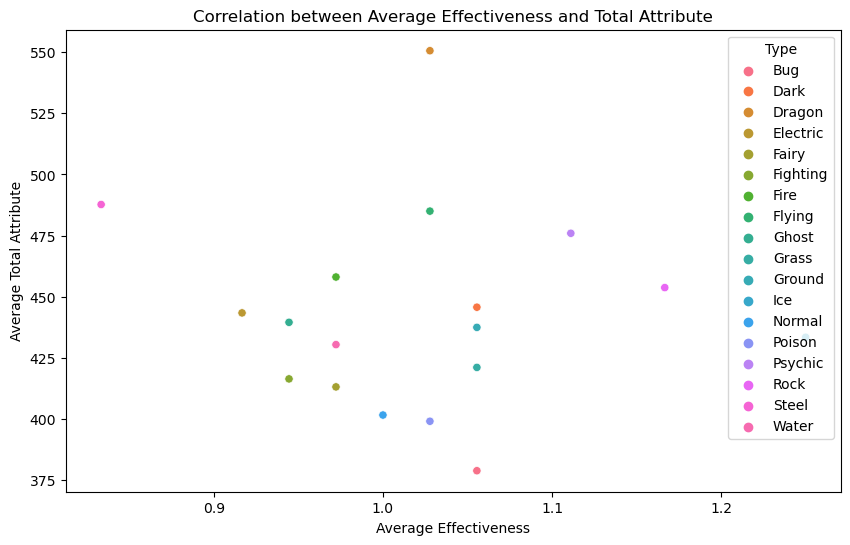

Correlation between Average Effectiveness and Total Attribute: -0.06155481397688639


In [29]:
average_total_by_type = data.groupby(['Type 1'])['Total'].mean().reset_index()

adjacency_matrix = pd.DataFrame(type_effectiveness_data).set_index('Attacking_Type')

average_effectiveness_by_type = adjacency_matrix.mean(axis=1).reset_index()
average_effectiveness_by_type.columns = ['Type', 'Average_Effectiveness']

merged_df = pd.merge(average_total_by_type, average_effectiveness_by_type, left_on='Type 1', right_on='Type')
correlation = merged_df['Total'].corr(merged_df['Average_Effectiveness'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Effectiveness', y='Total', data=merged_df, hue='Type')
plt.title('Correlation between Average Effectiveness and Total Attribute')
plt.xlabel('Average Effectiveness')
plt.ylabel('Average Total Attribute')
plt.show()

print(f'Correlation between Average Effectiveness and Total Attribute: {correlation}')

Using our adjacency matrix, we can see how effective each type is in relation to their total attribute. Looking at the scatter plot above there is no direct correlation between these 2 variables as the r-squared value is very close to 0. However, we can see some outliers like bug type, dragon type, and steel type. Bug type has been known to be one of the weaker Pokemon types so it makes sense that it has a lower average effectiveness but, surprisingly, it has such a high average total attribute. Next, the dragon type has been known to be one of the stronger types in Pokemon lore as shown by the high average total attribute, however, it has about average effectiveness against other types. Lastly, steel type seems to have the highest average effectiveness with a moderate average total attribute, suggesting that steel types might counter a lot of other types while having high defense stats.

### What insights can be gained from analyzing the relationship between specific attributes (e.g., Attack, Defense, Speed) and a Pokémon's effectiveness in battles?

In [30]:
def update_plot(type_selected):
    filtered_data = data[
        (data['Type 1'] == type_selected) | (data['Type 2'] == type_selected)
    ]

    if not filtered_data.empty:
        plt.figure(figsize=(12, 8))
        sns.kdeplot(x='CP', hue='Generation', data=filtered_data, fill=True, common_norm=False)
        plt.title(f'Ridge Plot of CP for {type_selected} Type Pokémon')
        plt.xlabel('CP')
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()
    else:
        print('No Pokemon available for the selected type.')

all_types = pd.concat([data['Type 1'], data['Type 2']]).unique()

type_dropdown = widgets.Dropdown(options=['All'] + list(all_types), value='All', description='Select Type:')

interactive_plot = interactive(
    update_plot,
    type_selected=type_dropdown,
)

display(interactive_plot)

interactive(children=(Dropdown(description='Select Type:', options=('All', 'Grass', 'Fire', 'Water', 'Bug', 'N…

In [31]:
all_types = ['All'] + data['Type 1'].unique().tolist()

type_dropdown = widgets.Dropdown(options=all_types, value='All', description='Select Type:')

def update_radar_chart(selected_type):
    if selected_type == 'All':
        filtered_data = data
    else:
        filtered_data = data[data['Type 1'] == selected_type]

    radar_data = []
    for _, row in filtered_data.iterrows():
        radar_data.append(go.Scatterpolar(
            r=row[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP']].tolist(),
            theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
            fill='toself',
            name=row['Name']
        ))

    layout = go.Layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 250]
            )
        ),
        showlegend=True,
        title="Stats for {} Type Pokémon".format(selected_type)
    )

    fig = go.Figure(data=radar_data, layout=layout)
    fig.update_layout(barmode='stack')
    fig.show()


interactive_radar_chart = interact(update_radar_chart, selected_type=type_dropdown)
display(interactive_radar_chart)

interactive(children=(Dropdown(description='Select Type:', options=('All', 'Grass', 'Fire', 'Water', 'Bug', 'N…

<function __main__.update_radar_chart(selected_type)>

Combat power is a good indication of total battle effectiveness and with the above plot we can see how the combat power(CP) chnages across types and generation. On average the combat power for all types are mostly between 300 and 1000 with a few being greater than 1000. Looking at the generation filter we can see as the generation increased there were more pokemon with greater average combat power by type suggesting the new pokemon are on average stronger than older generations of pokemon.

In the dynamic realm of Pokemon battles, combat power distribution is not merely a numerical measure but a nuanced interplay of type advantages, movepool diversity, and strategic prowess. Each Pokemon type boasts its unique strengths and weaknesses, influencing the gameplay and flow of combat power across generations. Furthermore, the multitude of movepool and abilities plays a pivotal role in determining a Pokemon's combat ability. Some possess formidable moves or unique abilities that transcend their base stats. Competitive battlers, recognizing these subtleties, meticulously construct tier lists based on a Pokemon's adaptability, move versatility, and strategic impact, adding an extra layer of complexity to the  world of Pokemon battles.

In [32]:
type1_dropdown = widgets.Dropdown(options=['All'] + data['Type 1'].unique().tolist(), value='All', description='Select Type 1:')
type2_dropdown = widgets.Dropdown(options=['All'] + data['Type 2'].dropna().unique().tolist(), value='All', description='Select Type 2:')
cp_slider = widgets.IntSlider(min=data['CP'].min(), max=data['CP'].max(), step=10, value=data['CP'].min(), description='Combat Power:')

def filter_pokemon(selected_type1, selected_type2, selected_cp):
    if selected_type1 == 'All' and selected_type2 == 'All':
        filtered_data = data[data['CP'] >= selected_cp]
    elif selected_type1 == 'All':
        filtered_data = data[((data['Type 2'] == selected_type2) | (data['Type 2'].isnull())) & (data['CP'] >= selected_cp)]
    elif selected_type2 == 'All':
        filtered_data = data[(data['Type 1'] == selected_type1) & (data['CP'] >= selected_cp)]
    else:
        filtered_data = data[((data['Type 1'] == selected_type1) & (data['Type 2'] == selected_type2)) & (data['CP'] >= selected_cp)]
    
    display(filtered_data)


interactive_df = interact(filter_pokemon, selected_type1=type1_dropdown, selected_type2=type2_dropdown, selected_cp=cp_slider)
display(interactive_df)

interactive(children=(Dropdown(description='Select Type 1:', options=('All', 'Grass', 'Fire', 'Water', 'Bug', …

<function __main__.filter_pokemon(selected_type1, selected_type2, selected_cp)>

As part of some further exploration we created this filter, that can help pokemon trainers search for specific pokemons to put on their roster based on combat power and type. This paired with the radar chart can give players an insight into which pokemons should be selected for different missions or battles. This can be improved upon by also having a seperate dataframe of move lists of each pokemon and finidng a way to rank them so each trainer can determine how adaptable their team is to other types and moves.

# References

Barradas, A. (2016) Pokemon with stats, Kaggle. Available at: https://www.kaggle.com/datasets/abcsds/pokemon (Accessed: 20 January 2024).

Matplotlib.pyplot.plot# (no date) matplotlib.pyplot.plot - Matplotlib 3.8.2 documentation. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html (Accessed: 21 January 2024).

Numpy user guide# (no date) NumPy user guide - NumPy v1.26 Manual. Available at: https://numpy.org/doc/1.26/user/index.html#user (Accessed: 24 January 2024).

Pokémon (no date) Wikipedia. Available at: https://en.wikipedia.org/wiki/Pok%C3%A9mon (Accessed: 21 January 2024).

User guide# (no date) User Guide - pandas 2.2.0 documentation. Available at: https://pandas.pydata.org/docs/user_guide/index.html#user-guide (Accessed: 24 January 2024).

Visualizing distributions of data# (no date) Visualizing distributions of data - seaborn 0.13.1 documentation. Available at: https://seaborn.pydata.org/tutorial/distributions.html (Accessed: 24 January 2024). 

Visualisation of graphs (no date) Visualisation of graphs - igraph 0.11.3 documentation. Available at: https://python.igraph.org/en/main/visualisation.html (Accessed: 24 January 2024). 

BinetCauchy (2023) How pokemon go calculates stats and Max CP, Pokémon GO Hub. Available at: https://pokemongohub.net/post/wiki/pokemon-go-calculates-stats-max-cp/ (Accessed: 24 January 2024). 

Jupyter widgets# (no date) Jupyter Widgets - Jupyter Widgets 8.1.2 documentation. Available at: https://ipywidgets.readthedocs.io/en/stable/ (Accessed: 03 February 2024). 

Kratos (2019) Combat Power Mechanics, Pokémon GO Hub. Available at: https://pokemongohub.net/post/wiki/cp-mechanics/ (Accessed: 28 January 2024). 

Littlechild, C. and O’Connor, Q. (2023) Pokemon: Ranking the elemental types from worst to best, TheGamer. Available at: https://www.thegamer.com/best-pokemon-type/#ice (Accessed: 11 February 2024). 

Pokémon type chart: Strengths and weaknesses (no date) Pokémon type chart: strengths and weaknesses | Pokémon Database. Available at: https://pokemondb.net/type (Accessed: 28 January 2024). 

Tutorial# (no date) Tutorial - NetworkX 3.2.1 documentation. Available at: https://networkx.org/documentation/stable/tutorial.html (Accessed: 09 February 2024). 